# SmartPath Career Engine: Personalized Job Recommendations System Using RIASEC, Skills and Education

Welcome to the SmartPath Career Engine, a personalized career recommendation tool designed to help users discover top job matches based on their **interests (RIASEC scores)**, **educational level**, and **core skills**.

This project combines:
- **RIASEC Theory** (Holland Codes) for personality-career alignment  
- **Skill-Based Matching** using real-world job competency data  
- **Education Fit Analysis** to understand qualification gaps  
- **Hybrid Similarity Scoring** to rank job fit comprehensively  

### How It Works:
1. Users provide:
   - Their RIASEC scores (scale: 0–7)
   - Highest education level (e.g., Bachelor's)
   - Up to 3 strong cognitive/technical skills
2. The system compares the user profile against a curated job dataset
3. Recommendations are generated, scored, and visualized
4. A downloadable CSV and email option delivers the top matches

---


## Problem Statement
In the face of a rapidly transforming global workforce, driven by automation, technological disruption, and shifting industry demands, navigating the job market has become increasingly complex. Students and job seekers, particularly those in underserved communities, often lack access to timely, personalized, and data-informed career guidance. Traditional career counseling systems tend to be static, generalized, and poorly aligned with real-time labor market needs.

As a result, many individuals unknowingly pursue career paths that are mismatched with their interests, skills, or educational backgrounds. This misalignment leads to underemployment, job dissatisfaction, and inefficient use of training and education resources.

SmartPath seeks to close this guidance gap by harnessing structured occupational data from the O*NET database to deliver personalized career recommendations based on an individual’s interests (RIASEC), skill strengths, and education level—offering a more dynamic, inclusive, and intelligent pathway to career alignment. Personalized career recommendations based on a user's skills, interests, and education level.

____

## Project Goal 
The primary goal of the SmartPath Career Recommendation Engine is to:

- Match users to careers that best align with their unique blend of interests, skills, and educational attainment
- Suggest alternative or adjacent occupations that users may not have previously considered
- Highlight gaps in skills or education and provide actionable insight for bridging them
- Empower users with data-driven guidance, enabling them to make confident and informed decisions in a fast-changing world of work

____

## Scope of the Project
This project encompasses the following components:

1. Occupational Data Modeling
    - Utilizes structured job data from O*NET, including RIASEC interest codes, required skills, and educational levels.

2. User Profiling Interface
    - Collects user inputs such as RIASEC scores, top skill strengths, and highest education level.

3. Recommendation Engine
    - Computes similarity between user profiles and occupational profiles using hybrid scoring (RIASEC similarity, skill match, and education alignment).

4. Insightful Output Generation
    - Displays top-matching job titles with similarity scores, matched skills, education gaps, and job descriptions.

5. User Interaction Layer
    - Provides a simple, intuitive interface for users to input information, receive career suggestions, and optionally download or email their results.
____

## 1. DATA UNDERSTANDING

### 1.1 Importing Libraries

In [5]:
# Importing libraries
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import numpy as np

warnings.filterwarnings('ignore')

### 1.2. Loading the Dataset

In [7]:
import pandas as pd

# Defining path to the dataset folder
data_path = 'data'

# Loading core datasets 
occupation_df = pd.read_excel(f'{data_path}/Occupation Data.xlsx')
interests_df = pd.read_excel(f'{data_path}/Interests.xlsx')
skills_df = pd.read_excel(f'{data_path}/Skills.xlsx')
education_df = pd.read_excel(f'{data_path}/Education, Training, and Experience.xlsx')
related_df = pd.read_excel(f'{data_path}/Related Occupations.xlsx')
abilities_df = pd.read_excel(f'{data_path}/Abilities.xlsx')
emerging_tasks_df = pd.read_excel(f'{data_path}/Emerging Tasks.xlsx')
edu_categories_df = pd.read_excel(f'{data_path}/Education, Training, and Experience Categories.xlsx')

### 1.3. Quick Peek at Data

In [9]:
# View structure of each DataFrame
print("Occupations:", occupation_df.shape)
print("Interests:", interests_df.shape)
print("Skills:", skills_df.shape)
print("Education:", education_df.shape)
print("Related Jobs:", related_df.shape)
print("Abilities:", abilities_df.shape)
print("Emerging Tasks:", emerging_tasks_df.shape)
print("Education Categories:", edu_categories_df.shape)

# Display sample rows
occupation_df.head(3)

Occupations: (1016, 3)
Interests: (8307, 9)
Skills: (61530, 15)
Education: (36209, 15)
Related Jobs: (18460, 6)
Abilities: (91416, 15)
Emerging Tasks: (240, 8)
Education Categories: (41, 6)


,O*NET-SOC Code,Title,Description
0,11-1011.00,Chief Executives,Determine and formulate policies and provide o...
1,11-1011.03,Chief Sustainability Officers,"Communicate and coordinate with management, sh..."
2,11-1021.00,General and Operations Managers,"Plan, direct, or coordinate the operations of ..."


In [10]:
occupation_df.head()
interests_df.head()
skills_df.head()
education_df.head()
related_df.head()
abilities_df.head()

,O*NET-SOC Code,Title,Element ID,Element Name,Scale ID,Scale Name,Data Value,N,Standard Error,Lower CI Bound,Upper CI Bound,Recommend Suppress,Not Relevant,Date,Domain Source
0,11-1011.00,Chief Executives,1.A.1.a.1,Oral Comprehension,IM,Importance,4.62,8,0.1830,4.2664,4.9836,N,NaN,08/2023,Analyst
1,11-1011.00,Chief Executives,1.A.1.a.1,Oral Comprehension,LV,Level,4.88,8,0.1250,4.6300,5.1200,N,N,08/2023,Analyst
2,11-1011.00,Chief Executives,1.A.1.a.2,Written Comprehension,IM,Importance,4.25,8,0.1637,3.9292,4.5708,N,NaN,08/2023,Analyst
3,11-1011.00,Chief Executives,1.A.1.a.2,Written Comprehension,LV,Level,4.88,8,0.1250,4.6300,5.1200,N,N,08/2023,Analyst
4,11-1011.00,Chief Executives,1.A.1.a.3,Oral Expression,IM,Importance,4.50,8,0.1890,4.1296,4.8704,N,NaN,08/2023,Analyst


### 1.4. Data Structure

In [12]:
# See column names
print(occupation_df.columns)
print('\n----------\n')  
print(interests_df.columns)
print('\n----------\n')
print(skills_df.columns)
print('\n----------\n')
print(education_df.columns)
print('\n----------\n')
print(related_df.columns)
print('\n----------\n')

Index(['O*NET-SOC Code', 'Title', 'Description'], dtype='object')

----------

Index(['O*NET-SOC Code', 'Title', 'Element ID', 'Element Name', 'Scale ID',
       'Scale Name', 'Data Value', 'Date', 'Domain Source'],
      dtype='object')

----------

Index(['O*NET-SOC Code', 'Title', 'Element ID', 'Element Name', 'Scale ID',
       'Scale Name', 'Data Value', 'N', 'Standard Error', 'Lower CI Bound',
       'Upper CI Bound', 'Recommend Suppress', 'Not Relevant', 'Date',
       'Domain Source'],
      dtype='object')

----------

Index(['O*NET-SOC Code', 'Title', 'Element ID', 'Element Name', 'Scale ID',
       'Scale Name', 'Category', 'Data Value', 'N', 'Standard Error',
       'Lower CI Bound', 'Upper CI Bound', 'Recommend Suppress', 'Date',
       'Domain Source'],
      dtype='object')

----------

Index(['O*NET-SOC Code', 'Title', 'Related O*NET-SOC Code', 'Related Title',
       'Relatedness Tier', 'Index'],
      dtype='object')

----------



## 2. DATA PREPARATION

### 2.1. Basic Cleanup & Rename 
* We’re renaming columns in the datasets for consistency and readability:
     - Shorter column names (e.g., ONET_Code instead of 'O*NET-SOC Code')
     - Standard naming across datasets
     - Prepping for merging- Having it renamed uniformly avoids bugs and errors.

In [15]:
# Standardize 'O*NET-SOC Code' column name
for df in [occupation_df, interests_df, skills_df, education_df, related_df, emerging_tasks_df, edu_categories_df]:
    df.rename(columns={'O*NET-SOC Code': 'ONET_Code'}, inplace=True) # Renaming for clarity

# Standardize abilities columns
abilities_df = abilities_df[['O*NET-SOC Code', 'Element Name', 'Scale ID', 'Data Value']]
abilities_df.rename(columns={'O*NET-SOC Code': 'ONET_Code', 'Element Name': 'Ability'}, inplace=True)
abilities_df = abilities_df[abilities_df['Scale ID'] == 'IM']  # Only Importance scale
abilities_df.drop(columns='Scale ID', inplace=True)

## 2.2. Explore & Transform the Data
We'll now:
- Extract RIASEC profiles per occupation
- Aggregate skills by occupation
- Get education level for each occupation
- Merge all into one clean job profile DataFrame

### 2.2.1. Transforming Interests and Creating RIASEC Vectors
RIASEC Vectors refer to a structured way of representing a person’s career interests using the RIASEC model, developed by psychologist John L. Holland.
| Code | Interest Type | Description                                     |
| ---- | ------------- | ----------------------------------------------- |
| R    | Realistic     | Practical, hands-on, physical activities        |
| I    | Investigative | Analytical, intellectual, scientific tasks      |
| A    | Artistic      | Creative, unstructured, expressive work         |
| S    | Social        | Helping, teaching, interacting with people      |
| E    | Enterprising  | Persuasive, leadership, business-oriented       |
| C    | Conventional  | Detail-oriented, organizational, administrative |

Each person has a RIASEC profile (a combination (vector) of these six interests).

Each occupation appears multiple times in interests_df — once for each of the 6 RIASEC types.

We want to pivot this From:
| ONET\_Code | Element Name  | Data Value |
| ---------- | ------------- | ---------- |
| 11-1011.00 | Realistic     | 1.38       |
| 11-1011.00 | Investigative | 2.25       |
| 11-1011.00 | Enterprising  | 4.63       |
| ...        | ...           | ...        |

To:
| ONET\_Code | Realistic | Investigative | Artistic | Social | Enterprising | Conventional |
| ---------- | --------- | ------------- | -------- | ------ | ------------ | ------------ |
| 11-1011.00 | 1.38      | 2.25          | 0.75     | 1.12   | 4.63         | 2.50         |

### 2.2.2. Pivot RIASEC scores

In [20]:
# Pivoting the interests to get one row per job with RIASEC scores
riasec_df = interests_df.pivot_table(index='ONET_Code',
                                     columns='Element Name',
                                     values='Data Value').reset_index()

# Renaming columns for consistency
riasec_df.columns.name = None  # To remove multiindex
riasec_df.rename(columns={
    'Realistic': 'R',
    'Investigative': 'I',
    'Artistic': 'A',
    'Social': 'S',
    'Enterprising': 'E',
    'Conventional': 'C'
}, inplace=True)

# Preview RIASEC vectors
riasec_df.head()

,ONET_Code,A,C,E,First Interest High-Point,I,R,Second Interest High-Point,S,Third Interest High-Point
0,11-1011.00,2.08,5.00,6.88,5.0,3.24,1.30,6.0,3.52,0.0
1,11-1011.03,2.48,4.49,6.68,5.0,4.78,2.04,2.0,3.55,6.0
2,11-1021.00,1.31,5.32,6.96,5.0,2.39,2.22,6.0,3.37,0.0
3,11-1031.00,2.70,3.62,5.52,5.0,3.35,1.54,4.0,3.69,6.0
4,11-2011.00,3.85,4.30,7.00,5.0,1.71,1.07,6.0,3.14,3.0


We now have RIASEC personality scores per job.

### 2.2.3. Transform Skills (Aggregating Top Skills per Job)

In [23]:
# Exploring what's in skills_df
skills_df['Scale ID'].value_counts()

Scale ID
IM    30765
LV    30765
Name: count, dtype: int64

O*NET provides two types of metrics for each skill:
| Scale ID | Meaning        | Description                                                          |
| -------- | -------------- | -------------------------------------------------------------------- |
| `IM`     | **Importance** | How critical the skill is to job performance                         |
| `LV`     | **Level**      | The degree of complexity or expertise required to perform that skill |

We'll keep only IM for now and pivot the top 10 skills:
- We'll use IM to prioritize what matters most in each job for similarity and recommendation.
- We may use LV later for skill gap analysis, upskilling paths, or to enrich the UI.

This will keep our recommender fast and user-friendly, while allowing deeper features later.

### 2.2.4. Filtering top skills by importance
We'll extract the top N important skills per occupation.

In [26]:
# Filtering only 'Importance' scores
important_skills_df = skills_df[skills_df['Scale ID'] == 'IM']

# Keeping top 10 most important skills per job
top_skills_df = important_skills_df.groupby('ONET_Code', group_keys=False).apply(
    lambda x: x.sort_values(by='Data Value', ascending=False).head(10)
).reset_index(drop=True)

# Preview of top skills for one job
top_skills_df[top_skills_df['ONET_Code'] == '11-1011.00']

,ONET_Code,Title,Element ID,Element Name,Scale ID,Scale Name,Data Value,N,Standard Error,Lower CI Bound,Upper CI Bound,Recommend Suppress,Not Relevant,Date,Domain Source
0,11-1011.00,Chief Executives,2.B.4.e,Judgment and Decision Making,IM,Importance,4.75,8,0.1637,4.4292,5.0000,N,NaN,08/2023,Analyst
1,11-1011.00,Chief Executives,2.A.2.a,Critical Thinking,IM,Importance,4.38,8,0.1830,4.0164,4.7336,N,NaN,08/2023,Analyst
2,11-1011.00,Chief Executives,2.B.2.i,Complex Problem Solving,IM,Importance,4.38,8,0.1830,4.0164,4.7336,N,NaN,08/2023,Analyst
3,11-1011.00,Chief Executives,2.B.5.d,Management of Personnel Resources,IM,Importance,4.25,8,0.1637,3.9292,4.5708,N,NaN,08/2023,Analyst
4,11-1011.00,Chief Executives,2.B.1.b,Coordination,IM,Importance,4.25,8,0.1637,3.9292,4.5708,N,NaN,08/2023,Analyst
5,11-1011.00,Chief Executives,2.B.5.b,Management of Financial Resources,IM,Importance,4.25,8,0.1637,3.9292,4.5708,N,NaN,08/2023,Analyst
6,11-1011.00,Chief Executives,2.A.1.d,Speaking,IM,Importance,4.25,8,0.1637,3.9292,4.5708,N,NaN,08/2023,Analyst
7,11-1011.00,Chief Executives,2.B.4.h,Systems Evaluation,IM,Importance,4.25,8,0.1637,3.9292,4.5708,N,NaN,08/2023,Analyst
8,11-1011.00,Chief Executives,2.B.4.g,Systems Analysis,IM,Importance,4.12,8,0.1250,3.8800,4.3700,N,NaN,08/2023,Analyst
9,11-1011.00,Chief Executives,2.B.1.d,Negotiation,IM,Importance,4.12,8,0.1250,3.8800,4.3700,N,NaN,08/2023,Analyst


This top_skills_df now gives us:
- A ranked list of the most important skills per job useful for matching a user’s known skills to jobs where they matter most. These skills can later be vectorized for similarity in our recommender


| Column                              | Meaning                                                   |
| ----------------------------------- | --------------------------------------------------------- |
| `ONET_Code`                         | The job (e.g., `11-1011.00` = Chief Executives)           |
| `Element Name`                      | The skill being rated (e.g., Critical Thinking)           |
| `Data Value`                        | **Importance score** from 0–5 (how critical the skill is) |
| `N`                                 | Sample size (e.g., how many people/data points)           |
| `Standard Error`                    | Confidence level of the rating                            |
| `Lower CI Bound` & `Upper CI Bound` | Confidence intervals                                      |
| `Domain Source`                     | Analyst = Provided by experts (vs incumbents or surveys)  |

### 2.2.5. Top required skills across occupations
To help make our recommendations more explainable.

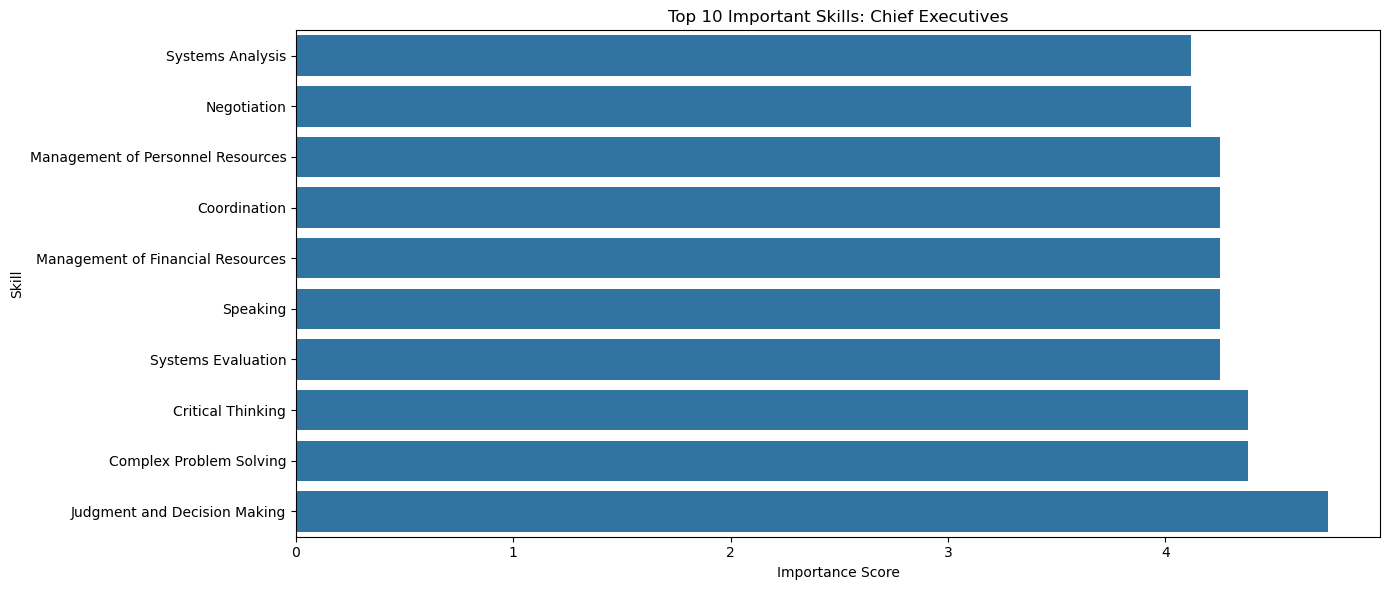

In [29]:
# Top 10 Skills for a Sample Job
onet_id = '11-1011.00'  
job_skills = top_skills_df[top_skills_df['ONET_Code'] == onet_id]

plt.figure(figsize=(14, 6))
sns.barplot(x='Data Value', y='Element Name', data=job_skills.sort_values('Data Value'))
plt.title("Top 10 Important Skills: Chief Executives")
plt.xlabel("Importance Score")
plt.ylabel("Skill")
plt.tight_layout()
plt.show()

**Interpretation:**
- This bar chart shows the top 10 most important skills required for the occupation Chief Executives, based on the O*NET skill importance ratings.

**Key Insights:**
- The most valued skills include Judgment and Decision Making, Complex Problem Solving, and Critical Thinking.
- Soft leadership abilities like Coordination and Speaking are equally emphasized.
- This visual helps users identify key competencies to develop if they’re aiming for executive roles.

### 2.2.6. Education Level Per Job
Here we are extracting the most common minimum required education level per job.

### a) Merging Education with Categories

In [33]:
# Merging education data with categories
education_df_with_cat = education_df.merge(
    edu_categories_df[['Element ID', 'Category', 'Category Description']],
    on='Element ID',
    how='left'
)

In [34]:
# Preview the merged DataFrame
print(education_df_with_cat.columns.tolist())

['ONET_Code', 'Title', 'Element ID', 'Element Name', 'Scale ID', 'Scale Name', 'Category_x', 'Data Value', 'N', 'Standard Error', 'Lower CI Bound', 'Upper CI Bound', 'Recommend Suppress', 'Date', 'Domain Source', 'Category_y', 'Category Description']


### b) Renaming columns for clarity

In [36]:
# Renaming columns for clarity with actual column names in the DataFrame
education_df_with_cat.rename(columns={
    'Category_y': 'Preparation Type',           # <-- correct source from merged df
    'Category Description': 'Preparation Level',
    'Element Name': 'Prep Component'
}, inplace=True)


# Preview DataFrame
education_df_with_cat[['ONET_Code', 'Prep Component', 'Preparation Type', 'Preparation Level']].head()

,ONET_Code,Prep Component,Preparation Type,Preparation Level
0,11-1011.00,Required Level of Education,1.0,Less than a High School Diploma
1,11-1011.00,Required Level of Education,2.0,High School Diploma - or the equivalent (for e...
2,11-1011.00,Required Level of Education,3.0,Post-Secondary Certificate - awarded for train...
3,11-1011.00,Required Level of Education,4.0,Some College Courses
4,11-1011.00,Required Level of Education,5.0,Associate's Degree (or other 2-year degree)


### c) Most Common Education Level Per Job

In [38]:
# Getting the most common (highest scoring) education level per job, now with category
edu_df_with_cat = (
    education_df_with_cat
    .sort_values(by='Data Value', ascending=False)
    .drop_duplicates(subset='ONET_Code')
    [['ONET_Code', 'Prep Component', 'Data Value', 'Preparation Type', 'Preparation Level']]
    .rename(columns={
        'Prep Component': 'Education Level',
        'Preparation Type': 'Education Category'
    })
)

# Preview the result
edu_df_with_cat.head()

,ONET_Code,Education Level,Data Value,Education Category,Preparation Level
5638,11-3051.01,Required Level of Education,100.00,12.0,Post-Doctoral Training
178363,29-9092.00,Required Level of Education,100.00,5.0,Associate's Degree (or other 2-year degree)
230522,43-2021.00,Required Level of Education,97.83,6.0,Bachelor's Degree
334045,51-8093.00,Required Level of Education,97.02,9.0,Post-Master's Certificate - awarded for comple...
281425,47-5081.00,Required Level of Education,96.59,8.0,Master's Degree


In [39]:
education_df_with_cat.head()

,ONET_Code,Title,Element ID,Prep Component,Scale ID,Scale Name,Category_x,Data Value,N,Standard Error,Lower CI Bound,Upper CI Bound,Recommend Suppress,Date,Domain Source,Preparation Type,Preparation Level
0,11-1011.00,Chief Executives,2.D.1,Required Level of Education,RL,Required Level Of Education (Categories 1-12),1.0,0.0,28,0.0,NaN,NaN,N,08/2023,Incumbent,1.0,Less than a High School Diploma
1,11-1011.00,Chief Executives,2.D.1,Required Level of Education,RL,Required Level Of Education (Categories 1-12),1.0,0.0,28,0.0,NaN,NaN,N,08/2023,Incumbent,2.0,High School Diploma - or the equivalent (for e...
2,11-1011.00,Chief Executives,2.D.1,Required Level of Education,RL,Required Level Of Education (Categories 1-12),1.0,0.0,28,0.0,NaN,NaN,N,08/2023,Incumbent,3.0,Post-Secondary Certificate - awarded for train...
3,11-1011.00,Chief Executives,2.D.1,Required Level of Education,RL,Required Level Of Education (Categories 1-12),1.0,0.0,28,0.0,NaN,NaN,N,08/2023,Incumbent,4.0,Some College Courses
4,11-1011.00,Chief Executives,2.D.1,Required Level of Education,RL,Required Level Of Education (Categories 1-12),1.0,0.0,28,0.0,NaN,NaN,N,08/2023,Incumbent,5.0,Associate's Degree (or other 2-year degree)


100.00 means 100% of surveyed job incumbents or analysts agreed that this is the most common education level required for that job.

Right now, "Education Level" only says "Required Level of Education" which is too vague. We’ll improve this by joining it with Education, Training, and Experience Categories datasets which maps education Element IDs to actual levels like:
- High school diploma
- Associate's degree
- Bachelor's degree
- Master's degree

### 2.2.7 Merging All into One Master Job Profile

In [42]:
# Creating full job profile
job_profiles = occupation_df.merge(riasec_df, on='ONET_Code', how='left')
job_profiles = job_profiles.merge(edu_df_with_cat, on='ONET_Code', how='left')

# Preview 
job_profiles[['Title', 'Description', 'Education Level', 'Education Category', 'Preparation Level']].head()

,Title,Description,Education Level,Education Category,Preparation Level
0,Chief Executives,Determine and formulate policies and provide o...,Related Work Experience,7.0,"Over 2 years, up to and including 4 years"
1,Chief Sustainability Officers,"Communicate and coordinate with management, sh...",Required Level of Education,11.0,Doctoral Degree
2,General and Operations Managers,"Plan, direct, or coordinate the operations of ...",Required Level of Education,10.0,First Professional Degree - awarded for comple...
3,Legislators,"Develop, introduce, or enact laws and statutes...",NaN,NaN,NaN
4,Advertising and Promotions Managers,"Plan, direct, or coordinate advertising polici...",Required Level of Education,1.0,Less than a High School Diploma


## 3. DATA CLEANING

### 3.1  Check for duplicates in the final job_profiles

In [45]:
# Checking for duplicates
job_profiles.duplicated().sum()

0

### 3.2 Check for missing values

In [47]:
# Checking missing values across all columns
job_profiles.isnull().sum()

ONET_Code                       0
Title                           0
Description                     0
A                              93
C                              93
E                              93
First Interest High-Point      93
I                              93
R                              93
Second Interest High-Point     93
S                              93
Third Interest High-Point      93
Education Level               158
Data Value                    158
Education Category            158
Preparation Level             179
dtype: int64

### 3.2.1. Handling Missing Values
#### a) Dropping rows with missing education info

- The education information is crucial for our filtering and matching logic in the recommender system, particularly in matching education levels to user input.
- Keeping rows with missing education info would risk:
    - Recommending jobs the user isn’t qualified for.
    - Breaking filters like: job_profiles[job_profiles['Education Level Code'] <= user_level]

In [49]:
# Dropping rows with missing education info
job_profiles_clean = job_profiles.dropna(subset=['Education Level', 'Education Category', 'Preparation Level'])

#### b) Filling missing RIASEC Interests with "Unknown"
- Interest codes are useful only for personality-aligned recommendations.
- Missing them doesn’t prevent your skill/education/task-based matching from working.
- Replacing with 'Unknown' allows us to keep potentially good matches.

In [51]:
# Defining the interest columns
interest_cols = ['First Interest High-Point', 'Second Interest High-Point', 'Third Interest High-Point']

# Filling missing RIASEC interests with 'Unknown'
job_profiles_clean.loc[:, interest_cols] = job_profiles_clean[interest_cols].fillna('Unknown')

In [52]:
# Preview the cleaned DataFrame
job_profiles_clean

,ONET_Code,Title,Description,A,C,E,First Interest High-Point,I,R,Second Interest High-Point,S,Third Interest High-Point,Education Level,Data Value,Education Category,Preparation Level
0,11-1011.00,Chief Executives,Determine and formulate policies and provide o...,2.08,5.00,6.88,5.0,3.24,1.30,6.0,3.52,0.0,Related Work Experience,68.24,7.0,"Over 2 years, up to and including 4 years"
1,11-1011.03,Chief Sustainability Officers,"Communicate and coordinate with management, sh...",2.48,4.49,6.68,5.0,4.78,2.04,2.0,3.55,6.0,Required Level of Education,74.07,11.0,Doctoral Degree
2,11-1021.00,General and Operations Managers,"Plan, direct, or coordinate the operations of ...",1.31,5.32,6.96,5.0,2.39,2.22,6.0,3.37,0.0,Required Level of Education,28.76,10.0,First Professional Degree - awarded for comple...
4,11-2011.00,Advertising and Promotions Managers,"Plan, direct, or coordinate advertising polici...",3.85,4.30,7.00,5.0,1.71,1.07,6.0,3.14,3.0,Required Level of Education,60.02,1.0,Less than a High School Diploma
5,11-2021.00,Marketing Managers,"Plan, direct, or coordinate marketing policies...",2.45,4.70,7.00,5.0,2.90,1.00,6.0,2.82,0.0,Required Level of Education,55.76,7.0,Post-Baccalaureate Certificate - awarded for c...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
991,53-7071.00,Gas Compressor and Gas Pumping Station Operators,"Operate steam-, gas-, electric motor-, or inte...",1.00,4.85,1.52,1.0,2.33,6.14,6.0,1.54,0.0,Required Level of Education,64.60,1.0,Less than a High School Diploma
992,53-7072.00,"Pump Operators, Except Wellhead Pumpers","Tend, control, or operate power-driven, statio...",1.00,4.51,1.46,1.0,2.26,6.67,6.0,1.28,0.0,Required Level of Education,60.86,2.0,High School Diploma - or the equivalent (for e...
993,53-7073.00,Wellhead Pumpers,Operate power pumps and auxiliary equipment to...,1.00,4.36,1.87,1.0,2.41,6.77,6.0,1.07,0.0,Required Level of Education,80.46,1.0,Less than a High School Diploma
994,53-7081.00,Refuse and Recyclable Material Collectors,Collect and dump refuse or recyclable material...,1.00,4.41,1.55,1.0,1.77,7.00,6.0,1.39,0.0,Required Level of Education,81.47,3.0,Post-Secondary Certificate - awarded for train...


In [53]:
# Preview the cleaned DataFrame
job_profiles_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 837 entries, 0 to 995
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ONET_Code                   837 non-null    object 
 1   Title                       837 non-null    object 
 2   Description                 837 non-null    object 
 3   A                           837 non-null    float64
 4   C                           837 non-null    float64
 5   E                           837 non-null    float64
 6   First Interest High-Point   837 non-null    float64
 7   I                           837 non-null    float64
 8   R                           837 non-null    float64
 9   Second Interest High-Point  837 non-null    float64
 10  S                           837 non-null    float64
 11  Third Interest High-Point   837 non-null    float64
 12  Education Level             837 non-null    object 
 13  Data Value                  837 non-null

### 3.3 Normalize RIASEC scores 
If different RIASEC types have different ranges (e.g., one maxes at 7.0 and another at 5.0), we normalize them to 0–1 for fair similarity comparison.

In [55]:
from sklearn.preprocessing import MinMaxScaler

riasec_cols = ['R', 'I', 'A', 'S', 'E', 'C']
scaler = MinMaxScaler()
job_profiles_clean[riasec_cols] = scaler.fit_transform(job_profiles_clean[riasec_cols])
job_profiles_clean[riasec_cols]

,R,I,A,S,E,C
0,0.050000,0.373333,0.180000,0.420000,0.980000,0.625468
1,0.173333,0.630000,0.246667,0.425000,0.946667,0.529963
2,0.203333,0.231667,0.051667,0.395000,0.993333,0.685393
4,0.011667,0.118333,0.475000,0.356667,1.000000,0.494382
5,0.000000,0.316667,0.241667,0.303333,1.000000,0.569288
...,...,...,...,...,...,...
991,0.856667,0.221667,0.000000,0.090000,0.086667,0.597378
992,0.945000,0.210000,0.000000,0.046667,0.076667,0.533708
993,0.961667,0.235000,0.000000,0.011667,0.145000,0.505618
994,1.000000,0.128333,0.000000,0.065000,0.091667,0.514981


### 3.4. Normalizing Education scores
- We normalize education scores to a 0–1 range for fair comparison.
- This ensures that education levels are comparable across different jobs, even if they have different maximum values

In [57]:
# Normalize Education Score for filtering or weighted scoring.
scaler = MinMaxScaler()
job_profiles_clean.loc[:,'Normalized Education Score'] = scaler.fit_transform(
    job_profiles_clean[['Education Category']].astype(float)
)

### 3.5. Validating Education values

In [59]:
# Checking unique values in Education Category and Preparation Level
print("Unique Education Category values:")
print(job_profiles_clean['Education Category'].sort_values().unique())

print("\nUnique Preparation Level values:")
print(job_profiles_clean['Preparation Level'].sort_values().unique())

Unique Education Category values:
[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12.]

Unique Preparation Level values:
['Anything beyond short demonstration, up to and including 1 month'
 "Associate's Degree (or other 2-year degree)" "Bachelor's Degree"
 'Doctoral Degree'
 'First Professional Degree - awarded for completion of a program that: requires at least 2 years of college work before entrance into the program, includes a total of at least 6 academic years of work to complete, and provides all remaining academic requirements to begin practice in a profession.'
 'High School Diploma - or the equivalent (for example, GED)'
 'Less than a High School Diploma' "Master's Degree"
 'None or short demonstration'
 'Over 1 month, up to and including 3 months'
 'Over 1 year, up to and including 2 years' 'Over 10 years'
 'Over 2 years, up to and including 4 years'
 'Over 3 months, up to and including 6 months'
 'Over 4 years, up to and including 10 years'
 'Over 4 years, up to and including 6 

### 3.6. Creating an Education Level Dictionary

In [61]:
# Creating an Education Level Dictionary
education_level_map = {
    1.0: "Less than High School",
    2.0: "High School Diploma or equivalent",
    3.0: "Post-Secondary Certificate",
    4.0: "Some College Courses",
    5.0: "Associate's Degree",
    6.0: "Bachelor's Degree",
    7.0: "Post-Baccalaureate Certificate",
    8.0: "Master's Degree",
    9.0: "Post-Master's Certificate",
    10.0: "First Professional Degree",
    11.0: "Doctoral Degree",
    12.0: "Post-Doctoral Training"
}

# Mapping the education levels to their corresponding codes
job_profiles_clean.loc[:,'Education Category Label'] = job_profiles_clean['Education Category'].map(education_level_map)
job_profiles_clean[['Education Category', 'Education Category Label', 'Preparation Level']].head(10)

,Education Category,Education Category Label,Preparation Level
0,7.0,Post-Baccalaureate Certificate,"Over 2 years, up to and including 4 years"
1,11.0,Doctoral Degree,Doctoral Degree
2,10.0,First Professional Degree,First Professional Degree - awarded for comple...
4,1.0,Less than High School,Less than a High School Diploma
5,7.0,Post-Baccalaureate Certificate,Post-Baccalaureate Certificate - awarded for c...
6,11.0,Doctoral Degree,Doctoral Degree
9,6.0,Bachelor's Degree,"Over 1 year, up to and including 2 years"
10,7.0,Post-Baccalaureate Certificate,Post-Baccalaureate Certificate - awarded for c...
12,4.0,Some College Courses,Some College Courses
13,12.0,Post-Doctoral Training,Post-Doctoral Training


### Checking for inconsistencies or nulls

In [63]:
# Check for any Education values with missing category labels
job_profiles_clean[job_profiles_clean['Education Category Label'].isnull()]

,ONET_Code,Title,Description,A,C,E,First Interest High-Point,I,R,Second Interest High-Point,S,Third Interest High-Point,Education Level,Data Value,Education Category,Preparation Level,Normalized Education Score,Education Category Label


### 3.7. Distribution of Education level across all jobs
To help understand education trends across jobs.

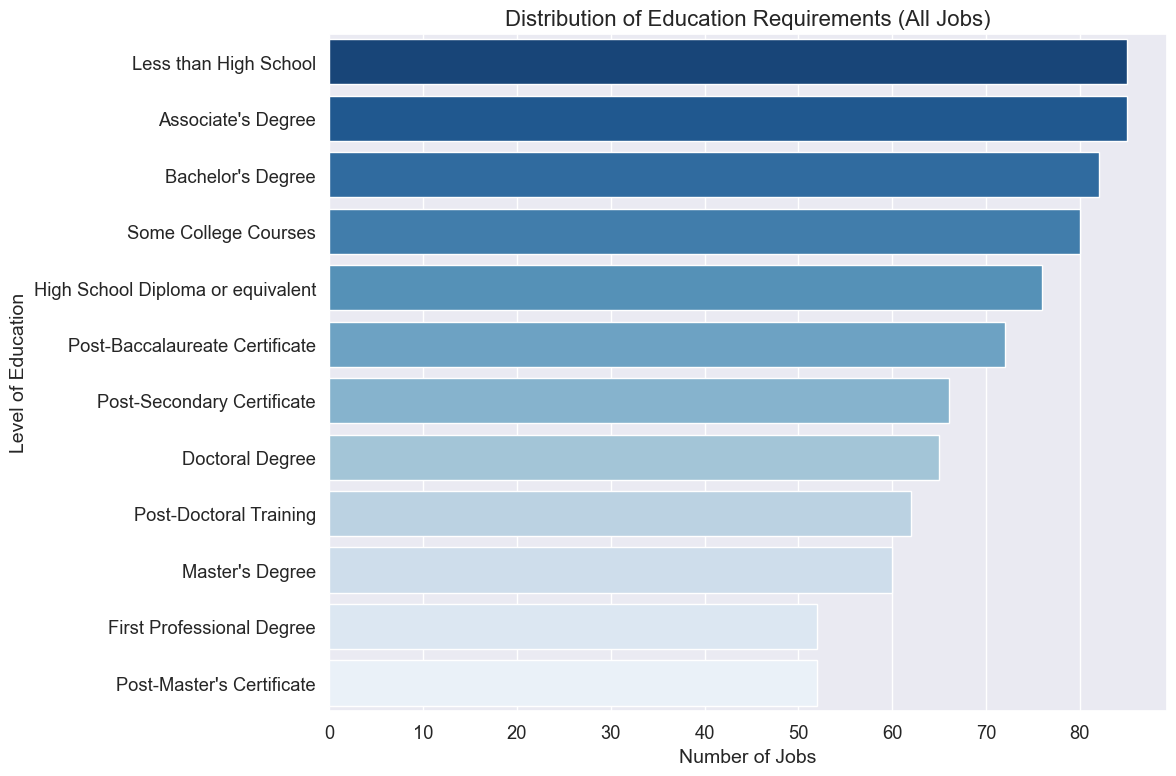

In [65]:
# Setting plot
plt.figure(figsize=(12, 8))
sns.set(font_scale=1.2)

# Creating the plot
sns.countplot(
    y='Education Category Label',
    data=job_profiles_clean,
    order=job_profiles_clean['Education Category Label'].value_counts().index,
    palette='Blues_r'  # Optional: adds color gradient
)

# Customizing titles and labels
plt.title("Distribution of Education Requirements (All Jobs)", fontsize=16)
plt.xlabel("Number of Jobs", fontsize=14)
plt.ylabel("Level of Education", fontsize=14)

# Improving layout
plt.tight_layout()

# Saving high-res image
plt.savefig('images/education_requirements_distribution.png', dpi=300)

# Show plot
plt.show()

**Interpretation:**

- This count plot shows the distribution of education requirements across all jobs in the dataset.

**Key Insights:**

- Most jobs require some level of formal education (like a diploma or degree).
- A large propotion of jobs do not require extreme levels of education, indicating that many roles are accessible to individuals with moderate education.

### 3.8. Distribution of RIASEC scores across all jobs
Distribution of RIASEC scores across all jobs to help us understand how interest types are spread in the workforce. This helps in:
- Identifying the most dominant interest types across careers
- Helping users compare their interests to market trends
- Revealing clusters of careers with similar personality profiles

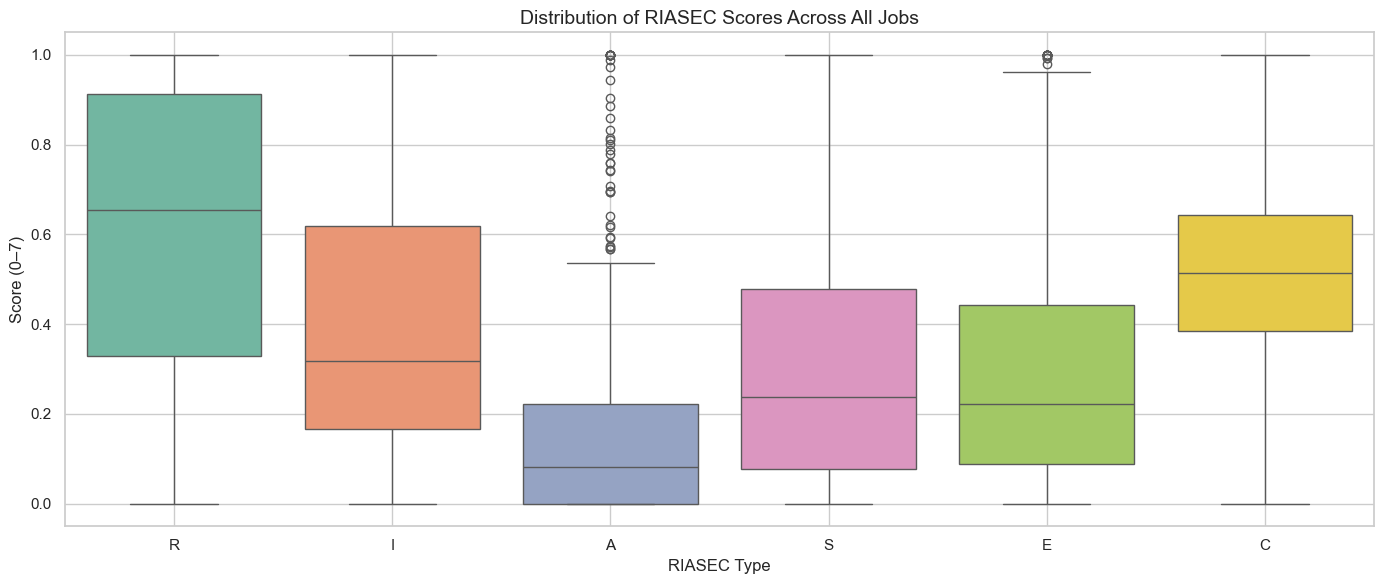

In [68]:
# Defining RIASEC columns
riasec_cols = ['R', 'I', 'A', 'S', 'E', 'C']

# Setting plot style
sns.set(style="whitegrid")
plt.figure(figsize=(14, 6))

# Melting the DataFrame for seaborn
riasec_melted = job_profiles_clean.melt(
    value_vars=riasec_cols, 
    var_name='RIASEC Type', 
    value_name='Score'
)

# Plot distribution
sns.boxplot(
    x='RIASEC Type', 
    y='Score', 
    hue='RIASEC Type',
    data=riasec_melted, 
    palette='Set2', 
    legend=False
)

plt.title('Distribution of RIASEC Scores Across All Jobs', fontsize=14)
plt.ylabel('Score (0–7)')
plt.xlabel('RIASEC Type')
plt.grid(True)
plt.tight_layout()
plt.show()

**Interpretation:**

This plot shows how RIASEC personality scores are distributed across all job profiles in the dataset. It helps identify which personality traits are more dominant in different careers and allows for comparison with a user’s profile.

## 4. DATA MODELLING

## Building The Recommendation Engine (RIASEC-Based)

### 4.1. RIASEC-Only Recommender (Cosine Similarity)
Match based on user interests only.

We'll:
1. Take a user’s RIASEC scores as input
2. Calculate cosine similarity between the user's profile and all jobs
3. Return the top matching jobs

### 4.1.1. Importing Libraries

In [73]:
from sklearn.metrics.pairwise import cosine_similarity

### 4.1.2. Definining a Sample user RIASEC Profile
Creating a test user input (we’ll later replace this with UI the user to self-rate themselves on a 1–7 scale) 

In [75]:
# RIASEC scores: [Realistic, Investigative, Artistic, Social, Enterprising, Conventional]
# Sample user RIASEC profile (scale: 0–7)
user_profile = {
    'R': 2.0,
    'I': 4.0,
    'A': 2.0,
    'S': 5.0,
    'E': 4.0,
    'C': 4.0
}

### 4.1.3. Extracting job RIASEC profiles

In [77]:
# Extracting job RIASEC features
job_riasec_vectors = job_profiles_clean[riasec_cols].values

# Converting user profile to vector(Normalizing by dividing each values by 7)
user_vector = np.array(list((score / 7 for score in user_profile.values()))).reshape(1, -1)

### 4.1.4 Computing Cosine Similarity

In [79]:
# Computing similarity between user and all job profiles
similarities = cosine_similarity(user_vector, job_riasec_vectors)

# Adding to DataFrame
job_profiles_clean.loc[:,'Similarity Score'] = similarities.flatten()
job_profiles_clean

,ONET_Code,Title,Description,A,C,E,First Interest High-Point,I,R,Second Interest High-Point,S,Third Interest High-Point,Education Level,Data Value,Education Category,Preparation Level,Normalized Education Score,Education Category Label,Similarity Score
0,11-1011.00,Chief Executives,Determine and formulate policies and provide o...,0.180000,0.625468,0.980000,5.0,0.373333,0.050000,6.0,0.420000,0.0,Related Work Experience,68.24,7.0,"Over 2 years, up to and including 4 years",0.545455,Post-Baccalaureate Certificate,0.892079
1,11-1011.03,Chief Sustainability Officers,"Communicate and coordinate with management, sh...",0.246667,0.529963,0.946667,5.0,0.630000,0.173333,2.0,0.425000,6.0,Required Level of Education,74.07,11.0,Doctoral Degree,0.909091,Doctoral Degree,0.931725
2,11-1021.00,General and Operations Managers,"Plan, direct, or coordinate the operations of ...",0.051667,0.685393,0.993333,5.0,0.231667,0.203333,6.0,0.395000,0.0,Required Level of Education,28.76,10.0,First Professional Degree - awarded for comple...,0.818182,First Professional Degree,0.860397
4,11-2011.00,Advertising and Promotions Managers,"Plan, direct, or coordinate advertising polici...",0.475000,0.494382,1.000000,5.0,0.118333,0.011667,6.0,0.356667,3.0,Required Level of Education,60.02,1.0,Less than a High School Diploma,0.000000,Less than High School,0.805936
5,11-2021.00,Marketing Managers,"Plan, direct, or coordinate marketing policies...",0.241667,0.569288,1.000000,5.0,0.316667,0.000000,6.0,0.303333,0.0,Required Level of Education,55.76,7.0,Post-Baccalaureate Certificate - awarded for c...,0.545455,Post-Baccalaureate Certificate,0.845025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
991,53-7071.00,Gas Compressor and Gas Pumping Station Operators,"Operate steam-, gas-, electric motor-, or inte...",0.000000,0.597378,0.086667,1.0,0.221667,0.856667,6.0,0.090000,0.0,Required Level of Education,64.60,1.0,Less than a High School Diploma,0.000000,Less than High School,0.598091
992,53-7072.00,"Pump Operators, Except Wellhead Pumpers","Tend, control, or operate power-driven, statio...",0.000000,0.533708,0.076667,1.0,0.210000,0.945000,6.0,0.046667,0.0,Required Level of Education,60.86,2.0,High School Diploma - or the equivalent (for e...,0.090909,High School Diploma or equivalent,0.541480
993,53-7073.00,Wellhead Pumpers,Operate power pumps and auxiliary equipment to...,0.000000,0.505618,0.145000,1.0,0.235000,0.961667,6.0,0.011667,0.0,Required Level of Education,80.46,1.0,Less than a High School Diploma,0.000000,Less than High School,0.547498
994,53-7081.00,Refuse and Recyclable Material Collectors,Collect and dump refuse or recyclable material...,0.000000,0.514981,0.091667,1.0,0.128333,1.000000,6.0,0.065000,0.0,Required Level of Education,81.47,3.0,Post-Secondary Certificate - awarded for train...,0.181818,Post-Secondary Certificate,0.514200


### 4.1.5 Cosine Similarity Distribution

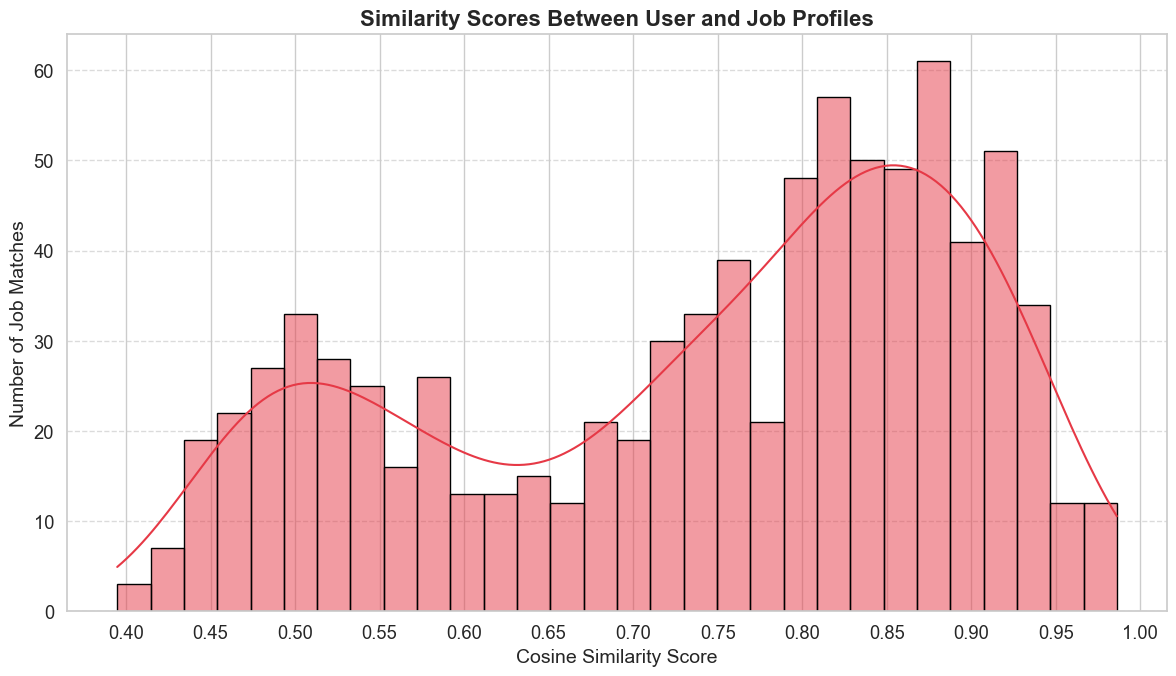

In [81]:
# Setting style
sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1.2)

# Setting figure size
plt.figure(figsize=(12, 7))

# Plot the histogram with KDE
sns.histplot(
    data=job_profiles_clean,
    x='Similarity Score',
    bins=30,
    kde=True,
    color='#E63946',
    edgecolor='black'
)

# Tittle and labels
plt.title("Similarity Scores Between User and Job Profiles", fontsize=16, weight='bold')
plt.xlabel("Cosine Similarity Score", fontsize=14)
plt.ylabel("Number of Job Matches", fontsize=14)
plt.xticks(np.arange(0.4, 1.05, 0.05))  #

# Adding a grid for readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Improving layout 
plt.tight_layout()
plt.savefig('images/similarity_scores_distribution.png', dpi=300)

# Show plot
plt.show()

**Interpretation:**
This histogram shows the distribution of cosine similarity scores between the user’s profile and different job descriptions based on their RIASEC vectors..

- X-axis: Cosine similarity score (0 to 1). Higher scores mean higher similarity.
- Y-axis: Number of jobs within each similarity range.

**Key Insights:**
- This helps visualize how many jobs are highly relevant to the user. 
- A concentration of bars toward the higher end means many jobs closely match the user’s profile.

### 4.1.6 Top Job/Career Recommendations Based on RIASEC Fit

In [84]:
# Top 10 jobs that match user's RIASEC interests
top_matches = job_profiles_clean.sort_values(by='Similarity Score', ascending=False)

# Show selected columns
top_matches[['Title', 'Education Level', 'Preparation Level', 'Description', 'Similarity Score']].head(10)

,Title,Education Level,Preparation Level,Description,Similarity Score
283,Probation Officers and Correctional Treatment ...,Required Level of Education,Post-Doctoral Training,Provide social services to assist in rehabilit...,0.986105
84,Training and Development Specialists,Required Level of Education,Doctoral Degree,Design or conduct work-related training and de...,0.982823
439,Clinical Nurse Specialists,Required Level of Education,Associate's Degree (or other 2-year degree),Direct nursing staff in the provision of patie...,0.978385
294,"Judges, Magistrate Judges, and Magistrates",Required Level of Education,Bachelor's Degree,"Arbitrate, advise, adjudicate, or administer j...",0.974210
360,Instructional Coordinators,Required Level of Education,Doctoral Degree,"Develop instructional material, coordinate edu...",0.973018
610,Travel Guides,On-the-Job Training,"Over 1 year, up to and including 2 years","Plan, organize, and conduct long-distance trav...",0.970984
355,Curators,Required Level of Education,Post-Baccalaureate Certificate - awarded for c...,"Administer collections, such as artwork, colle...",0.970292
298,"Business Teachers, Postsecondary",Required Level of Education,High School Diploma - or the equivalent (for e...,Teach courses in business administration and m...,0.970134
417,Dietitians and Nutritionists,Required Level of Education,Doctoral Degree,Plan and conduct food service or nutritional p...,0.969686
47,Emergency Management Directors,Required Level of Education,Less than a High School Diploma,Plan and direct disaster response or crisis ma...,0.968888


**Interpretation:**
- We ranked all job profiles based on how similar they are to the user’s RIASEC personality scores, using cosine similarity.
- Similarity = 0.99 → The user’s RIASEC profile is very closely aligned with the profile for this occupation.
- The top jobs are:
    - Creative, social, and teaching-oriented
    - Strongly aligned with Artistic (A), Social (S), and Investigative (I) dimensions
- If the user’s profile had high values for S, A, and I, this makes perfect sense.

**What To Say to Users:**
"Based on your interests, you may enjoy careers where creativity, human connection, and education intersect. Here are the top matches for your profile!"

### 4.1.7. Filter Jobs by Education Level 
- We’ll filter the top matches based on the user’s education level.

In [87]:
# Example filter: Only Bachelor's Degree and below
filtered_matches = top_matches[
    top_matches['Education Category'] <= 6.0  # <= Bachelor's Degree
]

filtered_matches[['Title', 'Education Level', 'Preparation Level', 'Description', 'Similarity Score']].head(10)

,Title,Education Level,Preparation Level,Description,Similarity Score
439,Clinical Nurse Specialists,Required Level of Education,Associate's Degree (or other 2-year degree),Direct nursing staff in the provision of patie...,0.978385
294,"Judges, Magistrate Judges, and Magistrates",Required Level of Education,Bachelor's Degree,"Arbitrate, advise, adjudicate, or administer j...",0.974210
610,Travel Guides,On-the-Job Training,"Over 1 year, up to and including 2 years","Plan, organize, and conduct long-distance trav...",0.970984
298,"Business Teachers, Postsecondary",Required Level of Education,High School Diploma - or the equivalent (for e...,Teach courses in business administration and m...,0.970134
47,Emergency Management Directors,Required Level of Education,Less than a High School Diploma,Plan and direct disaster response or crisis ma...,0.968888
312,"Economics Teachers, Postsecondary",Required Level of Education,High School Diploma - or the equivalent (for e...,Teach courses in economics. Includes both teac...,0.968753
32,"Education Administrators, Postsecondary",Required Level of Education,Some College Courses,"Plan, direct, or coordinate student instructio...",0.968574
323,"Law Teachers, Postsecondary",On-Site or In-Plant Training,Up to and including 1 month,Teach courses in law. Includes both teachers p...,0.964218
31,"Education Administrators, Kindergarten through...",Required Level of Education,High School Diploma - or the equivalent (for e...,"Plan, direct, or coordinate the academic, admi...",0.961673
322,"Criminal Justice and Law Enforcement Teachers,...",On-Site or In-Plant Training,"Over 1 year, up to and including 2 years","Teach courses in criminal justice, corrections...",0.960645


### 4.1.8 Filter Jobs by Similarity Threshold
- We’ll filter the top matches based on a similarity threshold to ensure we only recommend jobs that are closely aligned with the user’s profile.

In [89]:
# Defining similarity threshold
similarity_threshold = 0.95

# Filtering jobs based on similarity threshold and education level
sim_matches = filtered_matches[filtered_matches['Similarity Score'] >= similarity_threshold]

# Sorting the matches by similarity score
sim_matches = sim_matches.sort_values(by='Similarity Score', ascending=False)

# Show selected columns
sim_matches[['Title','Education Level', 'Preparation Level', 'Description', 'Similarity Score']].head(10)

,Title,Education Level,Preparation Level,Description,Similarity Score
439,Clinical Nurse Specialists,Required Level of Education,Associate's Degree (or other 2-year degree),Direct nursing staff in the provision of patie...,0.978385
294,"Judges, Magistrate Judges, and Magistrates",Required Level of Education,Bachelor's Degree,"Arbitrate, advise, adjudicate, or administer j...",0.974210
610,Travel Guides,On-the-Job Training,"Over 1 year, up to and including 2 years","Plan, organize, and conduct long-distance trav...",0.970984
298,"Business Teachers, Postsecondary",Required Level of Education,High School Diploma - or the equivalent (for e...,Teach courses in business administration and m...,0.970134
47,Emergency Management Directors,Required Level of Education,Less than a High School Diploma,Plan and direct disaster response or crisis ma...,0.968888
312,"Economics Teachers, Postsecondary",Required Level of Education,High School Diploma - or the equivalent (for e...,Teach courses in economics. Includes both teac...,0.968753
32,"Education Administrators, Postsecondary",Required Level of Education,Some College Courses,"Plan, direct, or coordinate student instructio...",0.968574
323,"Law Teachers, Postsecondary",On-Site or In-Plant Training,Up to and including 1 month,Teach courses in law. Includes both teachers p...,0.964218
31,"Education Administrators, Kindergarten through...",Required Level of Education,High School Diploma - or the equivalent (for e...,"Plan, direct, or coordinate the academic, admi...",0.961673
322,"Criminal Justice and Law Enforcement Teachers,...",On-Site or In-Plant Training,"Over 1 year, up to and including 2 years","Teach courses in criminal justice, corrections...",0.960645


### 4.1.9. RIASEC Radar Chart Comparing User vs Top Job
Visualize the match to help explain recommendations and compare the user's RIASEC profile against the top matching job

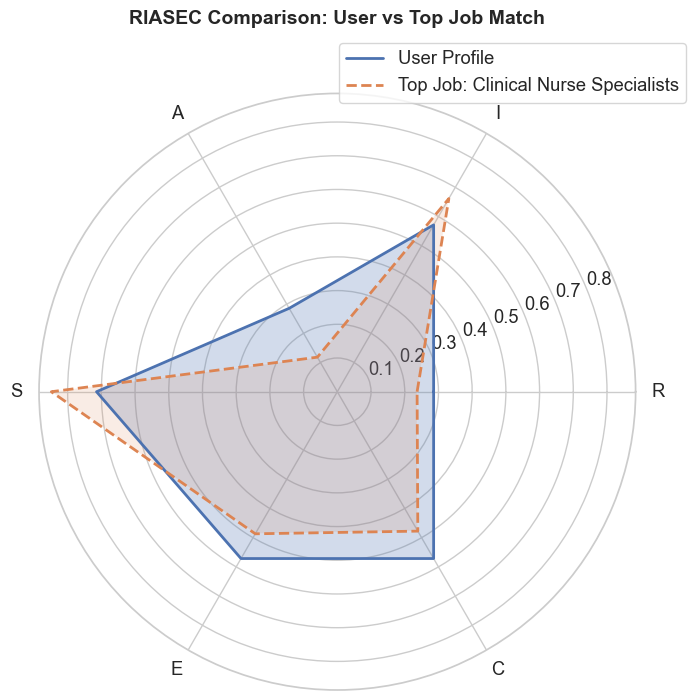

In [91]:
# Selecting top matching job
top_job = sim_matches.iloc[0]

# RIASEC order
riasec_labels = ['R', 'I', 'A', 'S', 'E', 'C']

# Getting user and job scores
user_scores = user_vector.flatten().tolist()


job_scores = [top_job[col] for col in riasec_labels]

# Closing the loop
user_scores += [user_scores[0]]
job_scores += [job_scores[0]]
labels = riasec_labels + [riasec_labels[0]]

# Only generate angles for the 6 base points
angles = np.linspace(0, 2 * np.pi, len(riasec_labels), endpoint=False).tolist()
angles += [angles[0]]

# Plotting
plt.figure(figsize=(14, 8))
ax = plt.subplot(111, polar=True)

ax.plot(angles, user_scores, linewidth=2, linestyle='solid', label='User Profile')
ax.fill(angles, user_scores, alpha=0.25)

ax.plot(angles, job_scores, linewidth=2, linestyle='dashed', label=f"Top Job: {top_job['Title']}")
ax.fill(angles, job_scores, alpha=0.15)

ax.set_xticks(angles[:-1])
ax.set_xticklabels(riasec_labels)
ax.set_title('RIASEC Comparison: User vs Top Job Match', size=14, weight='bold', pad=50)
ax.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1))

plt.tight_layout(pad=3)
plt.savefig('images/riasec_comparison_user_vs_job.png', dpi=300)
plt.show()

**Interpretation of the Chart:**

This radar chart compares the user’s RIASEC profile scores(Solid blue line) (Realistic, Investigative, Artistic, Social, Enterprising, Conventional) with the top matched job: Political Science Teachers, Postsecondary (dashed orange line.

- Each axis ranges from 0 to 7 (raw RIASEC scores before normalization).

**Key Insights:**

| RIASEC Trait          | User Score       | Job Score              | Interpretation                                                             |
| --------------------- | ---------------- | ---------------------- | -------------------------------------------------------------------------- |
| **R** (Realistic)     | Low (\~2)        | Low (\~2)              | Neither you nor the job requires mechanical/practical skills. Alignment. |
| **I** (Investigative) | High (\~6)       | Slightly lower (\~5.5) | You’re analytical; so is the job—good match.                              |
| **A** (Artistic)      | Moderate (\~3.5) | Slightly lower (\~3)   | Both lean creative, but not dominantly so. Partial fit.                    |
| **S** (Social)        | High (\~5)       | Very high (\~7)        | Teaching is very people-focused. Your profile fits well.                 |
| **E** (Enterprising)  | Medium (\~3.5)   | Slightly above (\~4)   | Job is more leadership-focused; you're a moderate fit.                     |
| **C** (Conventional)  | Low (\~1.5)      | Higher (\~3)           | You prefer unstructured work; job requires some order. Minor mismatch.    |


The user and the job align strongly on You and the job align strongly on:
- Social (S)
- Investigative (I)
- Low Realistic (R)

With a slight differences in:
- Conventional (C)
- Enterprising (E)

**Conclusion:** 

This is a strong RIASEC match, particularly for teaching, research, and discussion-heavy environments. A great suggestion if you're socially driven, analytical, and enjoy knowledge-sharing.

## 4.2 RIASEC + Education + Skills - Hybrid recommender Recommender (Filtered Similarity)
Objective: Refine job recommendations by including an education-level filter alongside RIASEC similarity, ensuring users only see jobs they're qualified for.
 - Match based on user interests
 - Filter jobs by user’s education level (Bachelor’s degree, in this case).

This enhancement filters out occupations that require a higher level of education than the user has attained. We still rank by RIASEC similarity, but only among jobs within the user's educational qualification range.
We'll now:
- Ask user for their education level
- Skill Match
- Filter job_profiles to remove jobs that require more education than the user has
- Return final recommendations (sorted by RIASEC similarity)

### 4.2.1. Extract or Encode Skill Features
We’ll use Prep Component (from education_df_with_cat) to identify the unique skill components. 

#### a) Grouping skills per job
This groups the skills by ONET Code, aggregating them into a list for each job.

In [95]:
# Grouping skills per job
skills_per_job = education_df_with_cat.groupby('ONET_Code')['Prep Component'] \
                                      .apply(list).reset_index()
skills_per_job.columns = ['ONET_Code', 'Skill List']

In [96]:
# Merging into job_profiles_clean
job_profiles_clean = job_profiles_clean.merge(skills_per_job, on='ONET_Code', how='left')

### 4.2.2. Encoding the skills using `OneHotEncoder`

* This step encodes the skills into a format suitable for machine learning.

In [98]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

# Exploding to long form and keeping ONET_Code
exploded_skills = job_profiles_clean[['ONET_Code', 'Skill List']].explode('Skill List')

# Encoding skills
skill_features = pd.DataFrame(
	encoder.fit_transform(exploded_skills[['Skill List']]),
	columns=encoder.get_feature_names_out(['Skill List'])
)
# Add ONET_Code back to skill_features for merging
skill_features['ONET_Code'] = exploded_skills['ONET_Code'].values

# Aggregate skill features by ONET_Code (sum, since one-hot)
skill_features = skill_features.groupby('ONET_Code', as_index=False).max()

# Merging into main DataFrame
job_profiles_clean = job_profiles_clean.drop(columns=['Skill List'], errors='ignore')
job_profiles_clean = job_profiles_clean.merge(skill_features, on='ONET_Code', how='left')

In [99]:
# Preview the final DataFrame structure
print("Final job profiles DataFrame structure:")
job_profiles_clean.head()

Final job profiles DataFrame structure:


,ONET_Code,Title,Description,A,C,E,First Interest High-Point,I,R,Second Interest High-Point,...,Preparation Level,Normalized Education Score,Education Category Label,Similarity Score,Skill List_Apprenticeship,Skill List_Job-Related Professional Certification,Skill List_On-Site or In-Plant Training,Skill List_On-the-Job Training,Skill List_Related Work Experience,Skill List_Required Level of Education
0,11-1011.00,Chief Executives,Determine and formulate policies and provide o...,0.180000,0.625468,0.980000,5.0,0.373333,0.050000,6.0,...,"Over 2 years, up to and including 4 years",0.545455,Post-Baccalaureate Certificate,0.892079,1.0,1.0,1.0,1.0,1.0,1.0
1,11-1011.03,Chief Sustainability Officers,"Communicate and coordinate with management, sh...",0.246667,0.529963,0.946667,5.0,0.630000,0.173333,2.0,...,Doctoral Degree,0.909091,Doctoral Degree,0.931725,1.0,1.0,1.0,1.0,1.0,1.0
2,11-1021.00,General and Operations Managers,"Plan, direct, or coordinate the operations of ...",0.051667,0.685393,0.993333,5.0,0.231667,0.203333,6.0,...,First Professional Degree - awarded for comple...,0.818182,First Professional Degree,0.860397,1.0,1.0,1.0,1.0,1.0,1.0
3,11-2011.00,Advertising and Promotions Managers,"Plan, direct, or coordinate advertising polici...",0.475000,0.494382,1.000000,5.0,0.118333,0.011667,6.0,...,Less than a High School Diploma,0.000000,Less than High School,0.805936,1.0,1.0,1.0,1.0,1.0,1.0
4,11-2021.00,Marketing Managers,"Plan, direct, or coordinate marketing policies...",0.241667,0.569288,1.000000,5.0,0.316667,0.000000,6.0,...,Post-Baccalaureate Certificate - awarded for c...,0.545455,Post-Baccalaureate Certificate,0.845025,0.0,0.0,1.0,1.0,1.0,1.0


### 4.2.3. Combining RIASEC + Normalized Skills + Normalized Education Vectors
We will combine:
- RIASEC scores (6D vector, already normalized)
- Skills (one-hot vector, binary)
- Education Score (scalar → we'll reshape it to 1D for vector concat)

In [101]:
# Extracting RIASEC, Education, and Skills values for further processing

riasec_values = job_profiles_clean[riasec_cols].values
education_values = job_profiles_clean['Normalized Education Score'].values

# Extracting skill columns from job_profiles_clean
skill_cols = [col for col in job_profiles_clean.columns if col.startswith("Skill List_")]
skills_values = job_profiles_clean[skill_cols].values

In [102]:
# Displaying the shapes of the extracted values
print(f'The education value shape {education_values.shape}')
print(f'The skill values shape{skills_values.shape}')
print(f'The riasec values shape {riasec_values.shape}')

The education value shape (837,)
The skill values shape(837, 6)
The riasec values shape (837, 6)


### 4.2.4. Normalize and Weight the Vectors
We'll scale each section to the same range, then apply custom weights:
- RIASEC: 50%
- Skills: 30%
- Education Score: 20%

Since the RIASEC and Education scores are already normalized to 0–1, we can directly apply the weights.We will scale the skills with the same `MinMaxScaler` to ensure they are also in the 0–1 range.

In [104]:
# Instantiate scaler
scaler = MinMaxScaler()

skill_values_scaled = scaler.fit_transform(skills_values)

riasec_w = 0.5
education_w = 0.2
skills_w = 0.3

# Ensure all are numpy arrays before multiplying
weighted_riasec = np.asarray(riasec_values) * riasec_w
weighted_education = np.asarray(education_values) * education_w
weighted_skills = np.asarray(skill_values_scaled) * skills_w

# Combining the weighted vectors
hybrid_matrix = np.hstack((weighted_riasec, weighted_education.reshape(-1, 1), weighted_skills))

In [105]:
hybrid_matrix.shape

(837, 13)

### 4.2.5. Building  User Vector and Computing Similarities
We'll:
- Create the user hybrid vector
- Compare with all job hybrid vectors using cosine similarity
- Return top-N matches

In [107]:
# User profile
user_riasec = user_vector
user_edu_score = np.array(6/12).reshape(1, -1)  # Normalized
user_skills = np.zeros(skills_values.shape[1]).reshape(1, -1)  # No known learning skills

In [108]:
# Hybrid User Vector
user_hybrid_vector = np.hstack([
    user_riasec * riasec_w,
    user_skills * skills_w,
    user_edu_score * education_w
])

In [109]:
# Computing cosine Similarity between user and all jobs profiles
hybrid_similarity = cosine_similarity(user_hybrid_vector, hybrid_matrix)

# Storing in DataFrame
job_profiles_clean['Hybrid Similarity'] = hybrid_similarity.flatten()
top_hybrid_matches = job_profiles_clean.sort_values('Hybrid Similarity', ascending=False).head(10)

### 4.2.6. Top 10 Hybrid Similarity Recommendations( RIASEC + Education)

In [111]:
top_hybrid_matches = job_profiles_clean.sort_values('Hybrid Similarity', ascending=False).head(10)

# Show top matches with useful columns
# top_hybrid_matches[['Title', 'Education Category Label', 'Hybrid Similarity', 'Similarity Score', 'Normalized Education Score']].style.background_gradient(cmap='YlGn')
top_hybrid_matches[['Title', 'Description', 'Education Level', 'Preparation Level', 'Education Category Label', 'Hybrid Similarity', 'Similarity Score', 'Normalized Education Score']].style.background_gradient(cmap='YlGn')

,Title,Description,Education Level,Preparation Level,Education Category Label,Hybrid Similarity,Similarity Score,Normalized Education Score
293,"Teaching Assistants, Postsecondary","Assist faculty or other instructional staff in postsecondary institutions by performing instructional support activities, such as developing teaching materials, leading discussion groups, preparing and giving examinations, and grading examinations or papers.",Required Level of Education,Less than a High School Diploma,Less than High School,0.928467,0.939634,0.000000
54,Equal Opportunity Representatives and Officers,"Monitor and evaluate compliance with equal opportunity laws, guidelines, and policies to ensure that employment practices and contracting arrangements give equal opportunity without regard to race, religion, color, national origin, sex, age, or disability.",Required Level of Education,"High School Diploma - or the equivalent (for example, GED)",High School Diploma or equivalent,0.923673,0.935225,0.090909
227,Community Health Workers,"Promote health within a community by assisting individuals to adopt healthy behaviors. Serve as an advocate for the health needs of individuals by assisting community residents in effectively communicating with healthcare providers or social service agencies. Act as liaison or advocate and implement programs that promote, maintain, and improve individual and overall community health. May deliver health-related preventive services such as blood pressure, glaucoma, and hearing screenings. May collect data to help identify community health needs.",On-the-Job Training,"Over 1 year, up to and including 2 years",Bachelor's Degree,0.921671,0.943867,0.454545
405,Genetic Counselors,"Assess individual or family risk for a variety of inherited conditions, such as genetic disorders and birth defects. Provide information to other healthcare providers or to individuals and families concerned with the risk of inherited conditions. Advise individuals and families to support informed decisionmaking and coping methods for those at risk. May help conduct research related to genetic conditions or genetic counseling.",Required Level of Education,Associate's Degree (or other 2-year degree),Associate's Degree,0.921493,0.939020,0.363636
443,Private Detectives and Investigators,"Gather, analyze, compile, and report information regarding individuals or organizations to clients, or detect occurrences of unlawful acts or infractions of rules in private establishment.",Required Level of Education,Some College Courses,Some College Courses,0.914266,0.930006,0.272727
512,"Sales Representatives, Wholesale and Manufacturing, Technical and Scientific Products","Sell goods for wholesalers or manufacturers where technical or scientific knowledge is required in such areas as biology, engineering, chemistry, and electronics, normally obtained from at least 2 years of postsecondary education.",On-Site or In-Plant Training,Up to and including 1 month,High School Diploma or equivalent,0.906512,0.917891,0.090909
199,Historians,"Research, analyze, record, and interpret the past as recorded in sources, such as government and institutional records, newspapers and other periodicals, photographs, interviews, films, electronic media, and unpublished manuscripts, such as personal diaries and letters.",On-Site or In-Plant Training,"Over 3 months, up to and including 6 months",Some College Courses,0.897710,0.912632,0.272727
8,Computer and Information Systems Managers,"Plan, direct, or coordinate activities in such fields as electronic data processing, information systems, systems analysis, and computer programming.",Required Level of Education,Some College Courses,Some College Courses,0.885588,0.899793,0.272727
364,Neurologists,"Diagnose, manage, and treat disorders and diseases of the brain, spinal cord, and peripheral nerves, with a primarily nonsurgical focus.",Required Level of Education,Some College Courses,Some College Courses,0.883653,0.896965,0.27272

This chart displays best-fit jobs ranked by combined similarity, showing education match and RIASEC similarity too.

### 4.2.7. Bar Plot for Hybrid Score Decomposition
- Helps explain why a job is recommended.
- Compute and Add a Skill Similarity Column

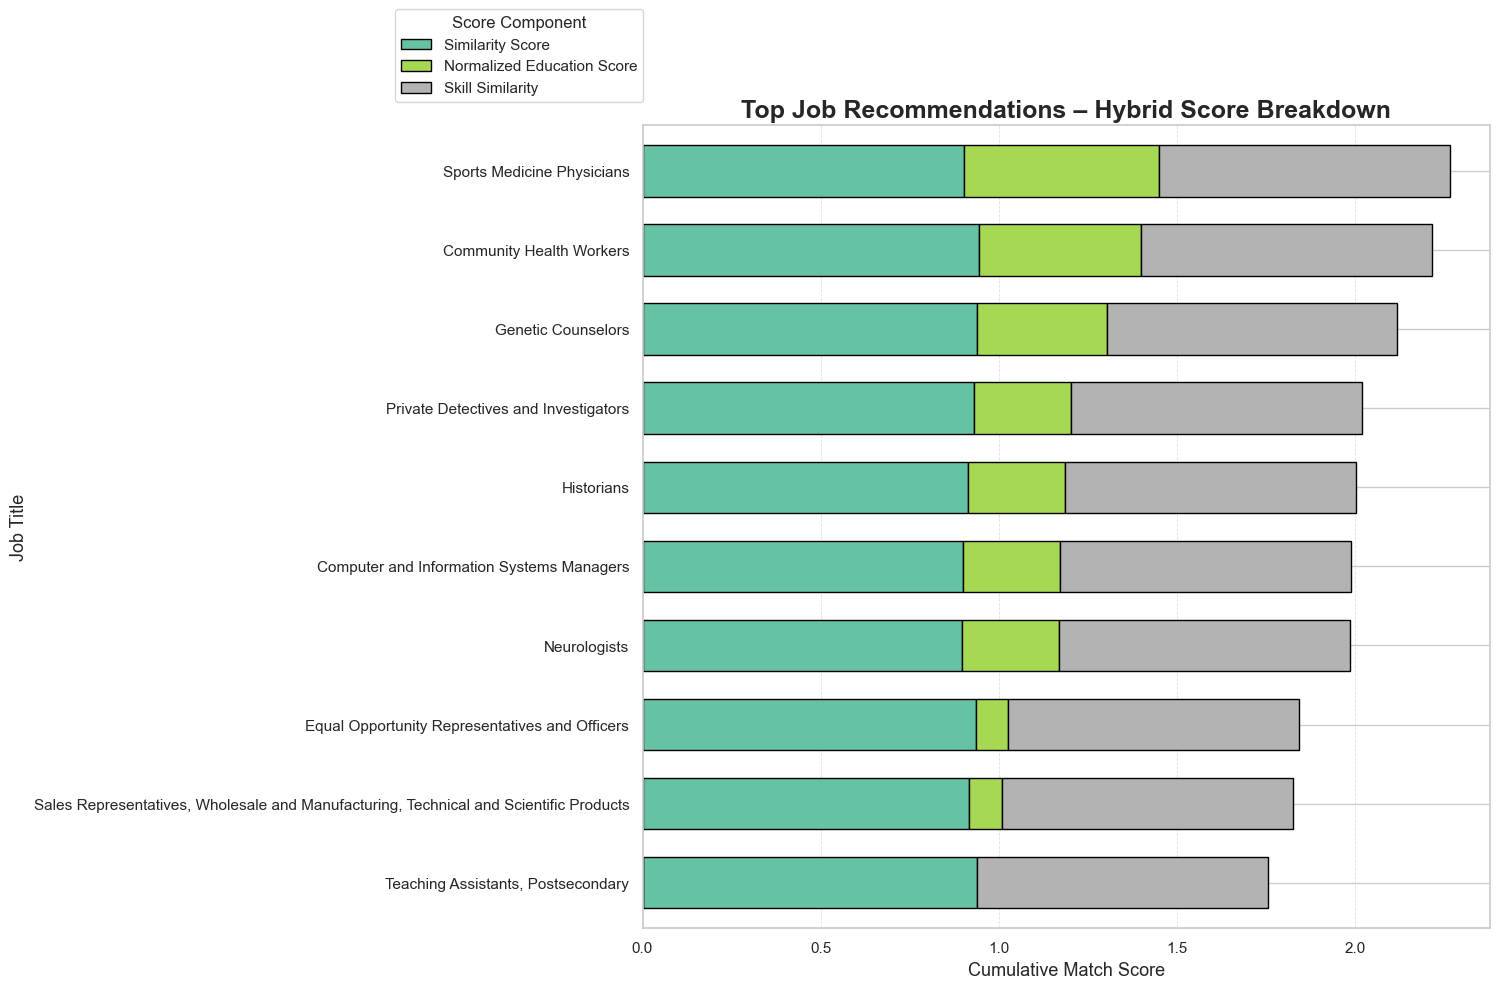

In [114]:
from sklearn.metrics.pairwise import cosine_similarity

# Getting one-hot skill column names
skill_cols = encoder.get_feature_names_out(['Skill List']).tolist()

# Removing overlapping skill columns
existing_skill_cols = [col for col in skill_cols if col in top_hybrid_matches.columns]
top_hybrid_matches = top_hybrid_matches.drop(columns=existing_skill_cols, errors='ignore')

# Merging one-hot skill features
top_hybrid_matches = top_hybrid_matches.merge(skill_features, on='ONET_Code', how='left')

# Defining user's skill vector (e.g, all skills)
user_skill_vector = np.ones((1, len(skill_cols)))

# Computing cosine similarity
job_skill_matrix = top_hybrid_matches[skill_cols].values
skill_similarities = cosine_similarity(user_skill_vector, job_skill_matrix)[0]

# Adding to DataFrame
top_hybrid_matches['Skill Similarity'] = skill_similarities

# Getting top 10 matches and prep plot data
top_n = top_hybrid_matches.head(10).copy()
plot_data = top_n[['Similarity Score', 'Normalized Education Score', 'Skill Similarity']]
plot_data.index = top_n['Title']
plot_data['Total'] = plot_data.sum(axis=1)
plot_data = plot_data.sort_values('Total', ascending=True).drop(columns='Total')

# Plot
fig, ax = plt.subplots(figsize=(16, 10))
plot_data.plot(
    kind='barh',
    stacked=True,
    ax=ax,
    colormap='Set2',
    edgecolor='black',
    width=0.65
)

# Title and labels
ax.set_title("Top Job Recommendations – Hybrid Score Breakdown", fontsize=18, fontweight='bold')
ax.set_xlabel("Cumulative Match Score", fontsize=13)
ax.set_ylabel("Job Title", fontsize=13)
ax.grid(axis='x', linestyle='--', linewidth=0.6, alpha=0.6)

# Font and spacing
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.tight_layout(pad=3)

# Legend placement 
ax.legend(
    title="Score Component",
    loc='lower right',
    bbox_to_anchor=(0.01, 1.02),  # Fine-tune legend position
    fontsize=11,
    title_fontsize=12
)

# Show and save
plt.savefig('images/hybrid_score_decomposition.png', dpi=300)
plt.show()

### 4.2.8. Comparison Chart of Cosine Similarity (Option A) vs Filtered Hybrid Similarity Scores (Option B)
Visualizing Cosine Similarity (Option A) vs Filtered Hybrid Similarity (Option B) for Top 10 Job Matches. A Side-by-Side View of RIASEC-Only vs RIASEC + Education + Skills Recommendations

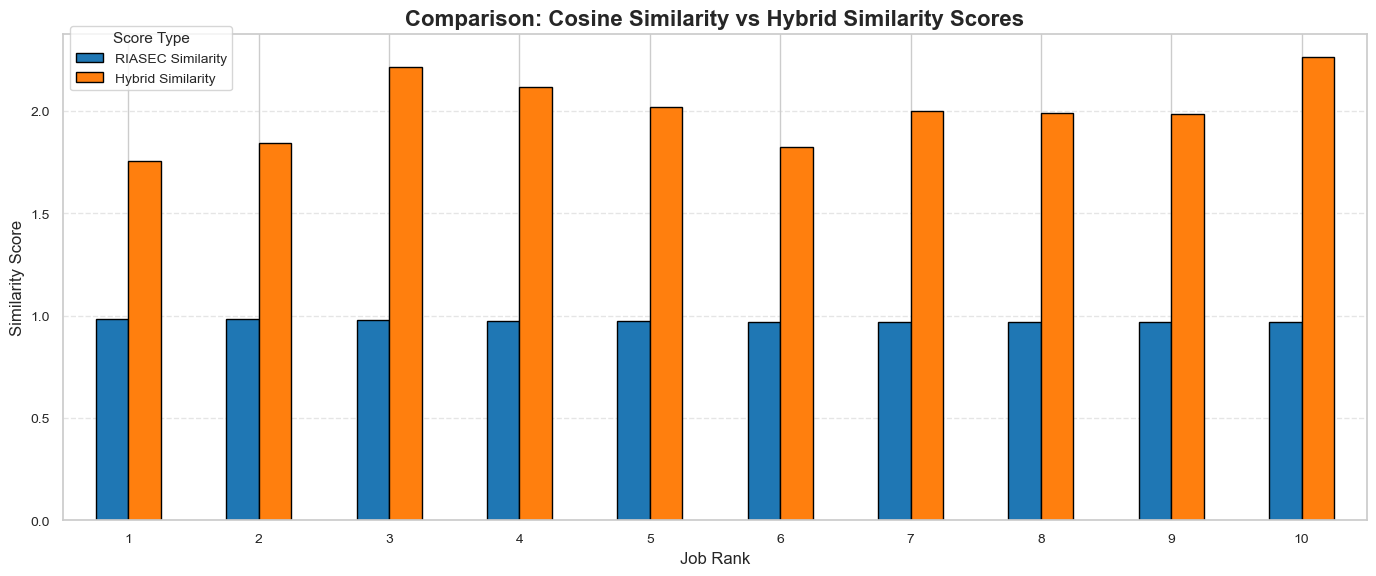

In [116]:
#  Getting top 10 scores from both methods
top_a = top_matches[['Title', 'Similarity Score']].copy().head(10)
top_b = top_hybrid_matches[['Title', 'Similarity Score', 'Normalized Education Score', 'Skill Similarity']].copy().head(10)

# Computing Hybrid Score
top_b['Hybrid Similarity'] = top_b[['Similarity Score', 'Normalized Education Score', 'Skill Similarity']].sum(axis=1)

# Adding a ranking index for consistent plotting
top_a.reset_index(drop=True, inplace=True)
top_b.reset_index(drop=True, inplace=True)
top_a['Rank'] = top_a.index + 1
top_b['Rank'] = top_b.index + 1

# Merging by Rank
comparison_df = pd.merge(
    top_a[['Rank', 'Similarity Score']],
    top_b[['Rank', 'Hybrid Similarity']],
    on='Rank'
)
comparison_df.rename(columns={'Similarity Score': 'RIASEC Similarity'}, inplace=True)

# Plot
custom_colors = ['#1f77b4', '#ff7f0e']  # 
ax = comparison_df.plot(
    x='Rank',
    kind='bar',
    figsize=(14, 6),
    color=custom_colors,
    edgecolor='black'
)

# Titles and Labels
plt.title("Comparison: Cosine Similarity vs Hybrid Similarity Scores", fontsize=16, fontweight='bold')
plt.xlabel("Job Rank", fontsize=12)
plt.ylabel("Similarity Score", fontsize=12)
plt.xticks(rotation=0, fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Legend in top-left
plt.legend(title="Score Type", loc='upper left', bbox_to_anchor=(0, 1.03), fontsize=10, title_fontsize=11)

# Save
plt.tight_layout()
plt.savefig('images/riasec_vs_hybrid_similarity_comparison.png', dpi=300)
plt.show()

##  Line Plot for RIASEC Only vs Hybrid Similarity Scores

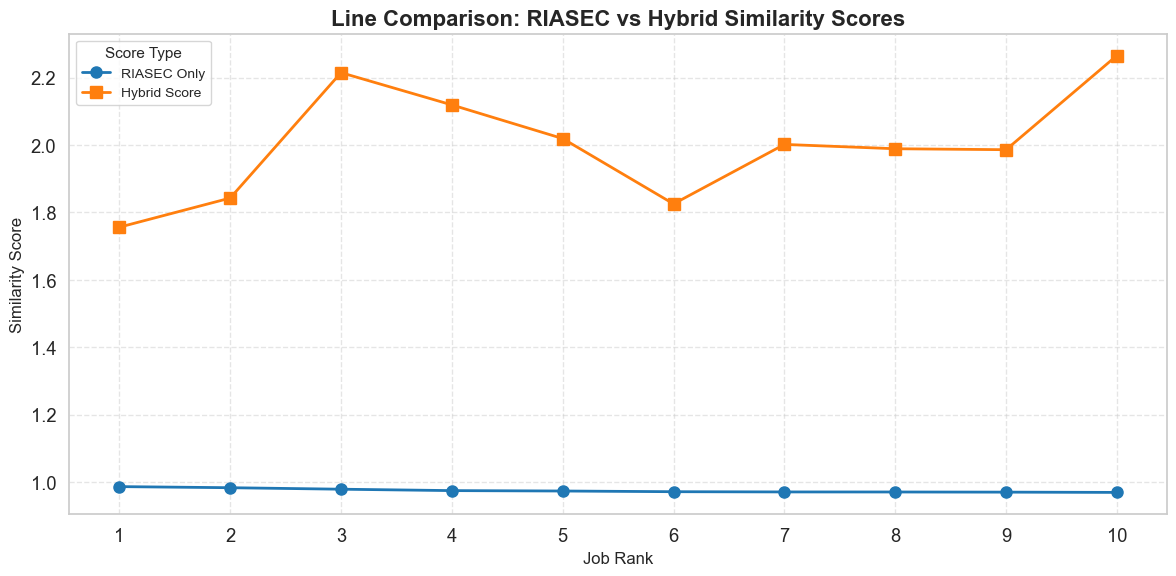

In [118]:
# Getting top 10 scores from both methods
top_a = top_matches[['Title', 'Similarity Score']].copy().head(10)
top_b = top_hybrid_matches[['Title', 'Similarity Score', 'Normalized Education Score', 'Skill Similarity']].copy().head(10)

# Computing Hybrid Score
top_b['Hybrid Similarity'] = top_b[['Similarity Score', 'Normalized Education Score', 'Skill Similarity']].sum(axis=1)

# Resetting index and assigning rank
top_a = top_a.reset_index(drop=True)
top_b = top_b.reset_index(drop=True)
top_a['Rank'] = top_a.index + 1
top_b['Rank'] = top_b.index + 1

# Merging by Rank
comparison_df = pd.merge(
    top_a[['Rank', 'Similarity Score']],
    top_b[['Rank', 'Hybrid Similarity']],
    on='Rank'
)
comparison_df.rename(columns={'Similarity Score': 'RIASEC Similarity'}, inplace=True)

# Plotting line graph
plt.figure(figsize=(12, 6))
plt.plot(comparison_df['Rank'], comparison_df['RIASEC Similarity'], marker='o', linewidth=2, markersize=8, label='RIASEC Only', color='#1f77b4')
plt.plot(comparison_df['Rank'], comparison_df['Hybrid Similarity'], marker='s', linewidth=2, markersize=8, label='Hybrid Score', color='#ff7f0e')

# Title and labels
plt.title("Line Comparison: RIASEC vs Hybrid Similarity Scores", fontsize=16, fontweight='bold')
plt.xlabel("Job Rank", fontsize=12)
plt.ylabel("Similarity Score", fontsize=12)
plt.xticks(comparison_df['Rank'], labels=comparison_df['Rank'])
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(loc='upper left', title="Score Type", fontsize=10, title_fontsize=11)
plt.tight_layout()

# Show
plt.savefig("images/riasec_vs_hybrid_similarity_lineplot.png", dpi=300)
plt.show()

**Interpretation:**

The top 10 recommended occupations (e.g., Community health worker, Genetic Councellors, Recreational Workers ) are:
- Highly aligned with the user’s RIASEC profile (cosine similarity scores above 0.92).
- Filtered to match the user’s education level (in this case: Bachelor’s degree).

Each job listed requires a "Required Level of Education", which—based on our mapping is aligned with or below the user’s qualification. This ensures the recommendations are both personally relevant and practically attainable.

| Criteria            | Option A (RIASEC Only)                                 | Option B (RIASEC + Education+Skill Filter)                 |
| ------------------- | ------------------------------------------------------ | ---------------------------------------------------- |
| Personal Fit        | Based on interest similarity                           | Same interest-based similarity                     |
| Education Relevance | Might include jobs the user is **not qualified** for   | Only includes jobs the user **is qualified** for   |
| Example Roles       | May include CEOs, lawyers, physicians                  | Shows more accessible jobs like therapists, teachers |
| Use Case            | Exploratory career matching                            | Realistic, action-ready suggestions                  |

**Conclusion:**

Option B delivers personalized and qualified career matches helping users explore realistic job opportunities while staying aligned with their interests.

### 4.2.9. Count Plot: How Many Jobs Were Filtered Out

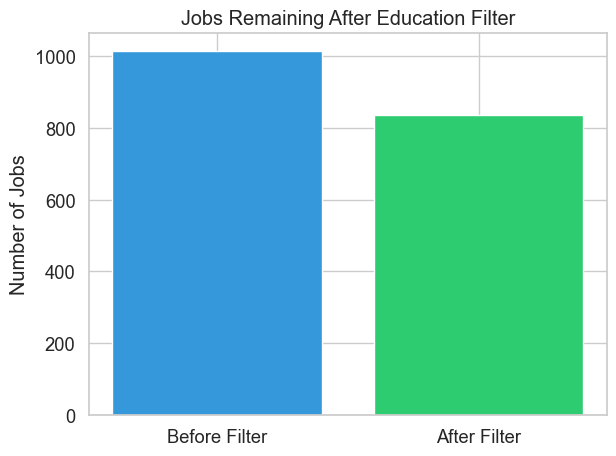

In [121]:
# Counting jobs before and after filtering
total_jobs = len(job_profiles)
filtered_jobs_count = len(job_profiles_clean['Normalized Education Score'] > (6/12))  # Assuming 6/12 is the threshold for Bachelor's Degree

# Bar plot
plt.bar(['Before Filter', 'After Filter'], [total_jobs, filtered_jobs_count], color=['#3498db', '#2ecc71'])
plt.title('Jobs Remaining After Education Filter')
plt.ylabel('Number of Jobs')
plt.tight_layout()
plt.savefig('images/jobs_remaining_after_education_filter.png', dpi=300)
plt.show()

The jobs were filtered out by 20% after applying the education level filter.

## 4.3 Enhancing Recommendations with User skill search

In [124]:
abilities_df

,ONET_Code,Ability,Data Value
0,11-1011.00,Oral Comprehension,4.62
2,11-1011.00,Written Comprehension,4.25
4,11-1011.00,Oral Expression,4.50
6,11-1011.00,Written Expression,4.12
8,11-1011.00,Fluency of Ideas,3.88
...,...,...,...
91406,53-7121.00,Hearing Sensitivity,3.00
91408,53-7121.00,Auditory Attention,3.00
91410,53-7121.00,Sound Localization,2.00
91412,53-7121.00,Speech Recognition,3.12


In [125]:
# Defining User Skill Preferences
user_selected_skills = ['Deductive Reasoning', 'Information Ordering', 'Mathematical Reasoning']

### 4.3.1 Binary Encode Job Skills
We'll create binary vectors for each job skill, marking 1 if the job requires a selected skill.

In [127]:
from sklearn.metrics.pairwise import cosine_similarity
# Getting skill column names (already one-hot encoded)
skill_cols = [col for col in job_profiles_clean.columns if col.startswith('Skill List_')]

# Building user skill vector (assumes user selects all skills)
user_skill_vector = np.array([1] * len(skill_cols)).reshape(1, -1)

# Creating job skill matrix and fill any NaNs (if any)
job_skill_matrix = job_profiles_clean[skill_cols].fillna(0).values

# Computing cosine similarity
skill_similarities = cosine_similarity(user_skill_vector, job_skill_matrix)[0]

# Adding similarity scores back to the DataFrame
job_profiles_clean['Skill Similarity'] = skill_similarities

In [128]:
# Creating binary matrix where 1 = job requires this user-selected ability
job_ability_matrix = abilities_df[abilities_df['Ability'].isin(user_selected_skills)].copy()

# Pivot to get 1 row per job, columns per selected ability
job_ability_matrix['has_skill'] = 1
job_ability_matrix = job_ability_matrix.pivot_table(
    index='ONET_Code',
    columns='Ability',
    values='has_skill',
    fill_value=0
).reset_index()

### 4.3.2. Computing Cosine Similarity

In [130]:
# Building user ability vector (all 1s since user selected all these skills)
user_ability_vector = np.array([1] * len(user_selected_skills)).reshape(1, -1)

# Creating job ability matrix
job_ability_matrix_only = job_ability_matrix[user_selected_skills].values
ability_similarities = cosine_similarity(user_ability_vector, job_ability_matrix_only)[0]

# Adding similarity back to job_ability_matrix
job_ability_matrix['Job Ability Skill Similarity'] = ability_similarities

### 4.3.3. Merging Ability with job_profiles_clean

In [132]:
# Merging ability similarities back into main job_profiles_clean DataFrame
job_profiles_clean = job_profiles_clean.merge(
    job_ability_matrix[['ONET_Code', 'Job Ability Skill Similarity']],
    on='ONET_Code',
    how='left'
)

# Filling any unmatched jobs with 0 similarity
job_profiles_clean['Job Ability Skill Similarity'] = job_profiles_clean['Job Ability Skill Similarity'].fillna(0)

In [133]:
# Checking the required columns exist (they should based on your recent output)
assert 'Similarity Score' in job_profiles_clean.columns
assert 'Normalized Education Score' in job_profiles_clean.columns
assert 'Skill Similarity' in job_profiles_clean.columns
assert 'Job Ability Skill Similarity' in job_profiles_clean.columns

### 4.3.4. Final Score - Job Hybrid Similarity Score with Ability

In [135]:
job_profiles_clean['Job Hybrid Similarity Score'] = (
    job_profiles_clean['Similarity Score'] +
    job_profiles_clean['Normalized Education Score'] +
    job_profiles_clean['Skill Similarity'] +
    job_profiles_clean['Job Ability Skill Similarity']
)

### 4.3.5. Top 10 Job Skill Hybrid Similarity Recommendations( RIASEC + Education + Skills + Job Skills)

In [137]:
# Sorting by total hybrid score including job abilities
top_job_hybrid_matches = job_profiles_clean.sort_values(
    'Job Hybrid Similarity Score',
    ascending=False
).head(10)

# Display top job matches with key info
top_job_hybrid_matches[[
    'Title',
    'Description',
    'Education Level',
    'Preparation Level',
    'Education Category Label',
    'Job Hybrid Similarity Score',
    'Hybrid Similarity',
    'Similarity Score',
    'Normalized Education Score'
]].style.background_gradient(cmap='YlGn')

,Title,Description,Education Level,Preparation Level,Education Category Label,Job Hybrid Similarity Score,Hybrid Similarity,Similarity Score,Normalized Education Score
225,Probation Officers and Correctional Treatment Specialists,"Provide social services to assist in rehabilitation of law offenders in custody or on probation or parole. Make recommendations for actions involving formulation of rehabilitation plan and treatment of offender, including conditional release and education and employment stipulations.",Required Level of Education,Post-Doctoral Training,Post-Doctoral Training,3.986105,0.751478,0.986105,1.000000
196,Urban and Regional Planners,"Develop comprehensive plans and programs for use of land and physical facilities of jurisdictions, such as towns, cities, counties, and metropolitan areas.",Required Level of Education,Post-Doctoral Training,Post-Doctoral Training,3.938289,0.727542,0.938289,1.000000
379,Naturopathic Physicians,"Diagnose, treat, and help prevent diseases using a system of practice that is based on the natural healing capacity of individuals. May use physiological, psychological or mechanical methods. May also use natural medicines, prescription or legend drugs, foods, herbs, or other natural remedies.",Required Level of Education,Post-Doctoral Training,Post-Doctoral Training,3.897019,0.723963,0.897019,1.000000
335,Optometrists,"Diagnose, manage, and treat conditions and diseases of the human eye and visual system. Examine eyes and visual system, diagnose problems or impairments, prescribe corrective lenses, and provide treatment. May prescribe therapeutic drugs to treat specific eye conditions.",Required Level of Education,Post-Doctoral Training,Post-Doctoral Training,3.893570,0.718050,0.893570,1.000000
68,Training and Development Specialists,Design or conduct work-related training and development programs to improve individual skills or organizational performance. May analyze organizational training needs or evaluate training effectiveness.,Required Level of Education,Doctoral Degree,Doctoral Degree,3.891914,0.763561,0.982823,0.909091
280,"Special Education Teachers, Secondary School","Teach academic, social, and life skills to secondary school students with learning, emotional, or physical disabilities. Includes teachers who specialize and work with students who are blind or have visual impairments; students who are deaf or have hearing impairments; and students with intellectual disabilities.",Required Level of Education,Post-Doctoral Training,Post-Doctoral Training,3.887890,0.706390,0.887890,1.000000
291,Instructional Coordinators,"Develop instructional material, coordinate educational content, and incorporate current technology into instruction in order to provide guidelines to educators and instructors for developing curricula and conducting courses. May train and coach teachers. Includes educational consultants and specialists, and instructional material directors.",Required Level of Education,Doctoral Degree,Doctoral Degree,3.882109,0.781602,0.973018,0.909091
499,Exercise Trainers and Group Fitness Instructors,"Instruct or coach groups or individuals in exercise activities for the primary purpose of personal fitness. Demonstrate techniques and form, observe participants, and explain to them corrective measures necessary to improve their skills. Develop and implement individualized approaches to exercise.",Required Level of Education,Post-Doctoral Training,Post-Doctoral Training,3.878936,0.681441,0.878936,1.000000
334,Dietitians and Nutritionists,"Plan and conduct food service or nutritional programs to assist in the promotion of health and control of disease. May supervise activities of a department providing quantity food services, counsel individuals, or conduct nutritional research.",Required Level of Education,Doctoral Degree,Doctoral Degree,3.878777,0.755082,0.969686,0.909091
34,Water Resource Specialists,"Design or implement programs and strategies related to water resource issues su

**Interpretation**:

This table shows the top 10 job recommendations based on the user’s RIASEC profile, education level, and selected skills. Each job is ranked by its hybrid similarity score, which combines interest alignment, education match, and skill relevance.

The scores however are not as good as the previous ones because we are now filtering by skills, which may not be present in all jobs.

Thus this model is not ideal when selecting job skills and a better way to build the engine would be to simply filtering it rather than using it in the hybrid similarity score.

**Key Insights**:

The recommendations do not align as well so we will build the final reccomender based on RIASEC + Education + Skills only, without the job skills filter but allow users to filter by skills in the UI.

## 4.4 Final Recommendation Engine
We will build the final recommendation engine based on RIASEC + Education + Skills only, without the job skills filter but allow users to filter by skills in the inputs.

### 4.4.1. Adding User Input Interface – Function-Based (get_user_profile() )
This will allow users to:
- Enter their RIASEC scores
- Select their education level
- Choose a few key skills (optional or predefined)

In [141]:
def get_user_profile():
    """
    Collect user profile input: RIASEC scores, education level, and selected skills.
    Returns:
        dict: User profile with RIASEC scores, education level (numeric), and list of skills.
    """

    # Step 1: RIASEC Input
    print("Enter your RIASEC Scores (scale of 0–7, separated by commas):")
    print("Format: R, I, A, S, E, C")
    r_i_a_s_e_c = input("Enter scores: ").strip().split(',')

    try:
        r, i, a, s, e, c = [float(score.strip()) for score in r_i_a_s_e_c]
    except ValueError:
        print("⚠️ Invalid RIASEC input. Defaulting to neutral scores.")
        r, i, a, s, e, c = [4.0] * 6

    # Step 2: Education Level Selection
    education_map = {
        1: "Less than High School",
        2: "High School Diploma or Equivalent",
        3: "Post-Secondary Certificate",
        4: "Some College Courses",
        5: "Associate Degree",
        6: "Bachelor's Degree",
        7: "Post-Baccalaureate's Degree",
        8: "Master's Degree",
        9: "Post-Master's Certificate",
        10: "First Professional Degree",
        11: "Doctoral Degree",
        12: "Post-Doctoral Training"
    }

    print("\nSelect your highest education level:")
    for k, v in education_map.items():
        print(f"{k}. {v}")
    
    edu_input = input("Enter the number corresponding to your education level: ").strip()
    try:
        education_level = int(edu_input)
        if education_level not in education_map:
            raise ValueError
    except ValueError:
        print("⚠️ Invalid input. Defaulting to Bachelor's Degree.")
        education_level = 6

    # Step 3: Skill Selection (up to 10)
    skill_map = {
        "1"  : 'Oral Comprehension',
        "2"  : 'Written Comprehension',
        "3"  : 'Oral Expression',
        "4"  : 'Written Expression',
        "5"  : 'Fluency of Ideas',
        "6"  : 'Originality',
        "7"  : 'Problem Sensitivity',
        "8"  : 'Deductive Reasoning',
        "9"  : 'Inductive Reasoning',
        "10" : 'Information Ordering',
        "11" : 'Category Flexibility',
        "12" : 'Mathematical Reasoning',
        "13" : 'Number Facility',
        "14" : 'Memorization',
        "15" : 'Speed of Closure',
        "16" : 'Flexibility of Closure',
        "17" : 'Perceptual Speed',
        "18" : 'Spatial Orientation',
        "19" : 'Visualization',
        "20" : 'Selective Attention',
        "21" : 'Time Sharing',
        "22" : 'Arm-Hand Steadiness',
        "23" : 'Manual Dexterity',
        "24" : 'Finger Dexterity',
        "25" : 'Control Precision',
        "26" : 'Multilimb Coordination',
        "27" : 'Response Orientation',
        "28" : 'Rate Control',
        "29" : 'Reaction Time',
        "30" : 'Wrist-Finger Speed',
        "31" : 'Speed of Limb Movement',
        "32" : 'Static Strength',
        "33" : 'Explosive Strength',
        "34" : 'Dynamic Strength',
        "35" : 'Trunk Strength',
        "36" : 'Stamina',
        "37" : 'Extent Flexibility',
        "38" : 'Dynamic Flexibility',
        "39" : 'Gross Body Coordination',
        "40" : 'Gross Body Equilibrium',
        "41" : 'Near Vision',
        "42" : 'Far Vision',
        "43" : 'Visual Color Discrimination',
        "44" : 'Night Vision',
        "45" : 'Peripheral Vision',
        "46" : 'Depth Perception',
        "47" : 'Glare Sensitivity',
        "48" : 'Hearing Sensitivity',
        "49" : 'Auditory Attention',
        "50" : 'Sound Localization',
        "51" : 'Speech Recognition',
        "52" : 'Speech Clarity'
    }

    print("\nSelect up to 10 skills you consider strong:")
    for k, v in skill_map.items():
        print(f"{k}. {v}")

    skill_input = input("Enter skill numbers separated by commas (e.g., 1,8,12): ").strip()
    user_skills = []
    if skill_input:
        user_skills = [skill_map[num.strip()] for num in skill_input.split(',') if num.strip() in skill_map]

    print("\nProfile Captured. Generating personalized recommendations...\n")

    return {
        'R': r, 'I': i, 'A': a, 'S': s, 'E': e, 'C': c,
        'education_level': education_level,
        'skills': user_skills
    }

### 4.4.2. Example Usage

# user_profile = get_user_profile()
user_profile = get_user_profile()

print("\n--- USER PROFILE SUMMARY ---")
print(f"RIASEC Scores: R={user_profile['R']}, I={user_profile['I']}, A={user_profile['A']}, "
      f"S={user_profile['S']}, E={user_profile['E']}, C={user_profile['C']}")
print("Education Level:", user_profile['education_level'])
print("Selected Skills:", user_profile['skills'])

We have now created the user input interface

### 4.4.3. Building Hybrid Recommendation Function (generate_recommendations() )


### Use User Input to Generate Recommendations
Well now create core logic that uses interface input to generate hybrid recommendations by:
- Converting RIASEC input into a vector
- Matching education level to numeric value
- Comparing input with each job in the dataset using similarity metrics
- Scoring each job: RIASEC similarity + education match + skill overlap
- Returns top 5 job matches

In [146]:
def generate_recommendations(user_profile, job_profiles_clean):
    """
    Generate top 10 job recommendations based on RIASEC, education, and skill similarity.
    """

    # RIASEC Similarity
    riasec_cols = ['R', 'I', 'A', 'S', 'E', 'C']
    user_vector = np.array([
        user_profile['R'], user_profile['I'], user_profile['A'],
        user_profile['S'], user_profile['E'], user_profile['C']
    ]).reshape(1, -1)

    job_vectors = job_profiles_clean[riasec_cols].values
    riasec_similarities = cosine_similarity(user_vector, job_vectors)[0]
    job_profiles_clean['User RIASEC Similarity'] = riasec_similarities

    # Education Match Score - already included as 'Normalized Education Score' (0 to 1 scale)

    # Skill Similarity
    skill_cols = [col for col in job_profiles_clean.columns if col.startswith("Skill List_")]
    
    # Converting user skill names to vector
    user_skills = user_profile.get('skills', [])
    user_skill_vector = np.zeros((1, len(skill_cols)))

    for i, skill in enumerate(skill_cols):
        skill_name = skill.replace("Skill List_", "").lower()
        if any(skill_name in s.lower() for s in user_skills):
            user_skill_vector[0][i] = 1

    job_skill_matrix = job_profiles_clean[skill_cols].fillna(0).values
    skill_similarities = cosine_similarity(user_skill_vector, job_skill_matrix)[0]
    job_profiles_clean['User Skill Similarity'] = skill_similarities

    # Final Hybrid Score 
    job_profiles_clean['Hybrid Recommendation Score'] = (
        job_profiles_clean['User RIASEC Similarity'] +
        job_profiles_clean['Normalized Education Score'] +
        job_profiles_clean['User Skill Similarity']
    )

    # Top 10 Recommendations 
    top_matches = job_profiles_clean.sort_values('Hybrid Recommendation Score', ascending=False).head(10)

    # Returning selected columns for display
    return top_matches[[
        'Title', 'Description', 'Education Level', 'Preparation Level',
        'Education Category Label', 'Hybrid Recommendation Score',
        'User RIASEC Similarity', 'Normalized Education Score', 'User Skill Similarity'
    ]]

### 4.4.4. Example Usage

In [148]:
# Collecting user input
user = get_user_profile()

# Generating recommendations based on user input and your cleaned job dataset
recommendations = generate_recommendations(user, job_profiles_clean)
recommendations.style.background_gradient(cmap='YlGn')

Enter your RIASEC Scores (scale of 0–7, separated by commas):
Format: R, I, A, S, E, C


Enter scores:  1, 4, 5, 7, 5, 6



Select your highest education level:
1. Less than High School
2. High School Diploma or Equivalent
3. Post-Secondary Certificate
4. Some College Courses
5. Associate Degree
6. Bachelor's Degree
7. Post-Baccalaureate's Degree
8. Master's Degree
9. Post-Master's Certificate
10. First Professional Degree
11. Doctoral Degree
12. Post-Doctoral Training


Enter the number corresponding to your education level:  4



Select up to 10 skills you consider strong:
1. Oral Comprehension
2. Written Comprehension
3. Oral Expression
4. Written Expression
5. Fluency of Ideas
6. Originality
7. Problem Sensitivity
8. Deductive Reasoning
9. Inductive Reasoning
10. Information Ordering
11. Category Flexibility
12. Mathematical Reasoning
13. Number Facility
14. Memorization
15. Speed of Closure
16. Flexibility of Closure
17. Perceptual Speed
18. Spatial Orientation
19. Visualization
20. Selective Attention
21. Time Sharing
22. Arm-Hand Steadiness
23. Manual Dexterity
24. Finger Dexterity
25. Control Precision
26. Multilimb Coordination
27. Response Orientation
28. Rate Control
29. Reaction Time
30. Wrist-Finger Speed
31. Speed of Limb Movement
32. Static Strength
33. Explosive Strength
34. Dynamic Strength
35. Trunk Strength
36. Stamina
37. Extent Flexibility
38. Dynamic Flexibility
39. Gross Body Coordination
40. Gross Body Equilibrium
41. Near Vision
42. Far Vision
43. Visual Color Discrimination
44. Night Vi

Enter skill numbers separated by commas (e.g., 1,8,12):  6, 18, 20



Profile Captured. Generating personalized recommendations...



,Title,Description,Education Level,Preparation Level,Education Category Label,Hybrid Recommendation Score,User RIASEC Similarity,Normalized Education Score,User Skill Similarity
225,Probation Officers and Correctional Treatment Specialists,"Provide social services to assist in rehabilitation of law offenders in custody or on probation or parole. Make recommendations for actions involving formulation of rehabilitation plan and treatment of offender, including conditional release and education and employment stipulations.",Required Level of Education,Post-Doctoral Training,Post-Doctoral Training,1.958042,0.958042,1.000000,0.000000
323,Court Reporters and Simultaneous Captioners,"Use verbatim methods and equipment to capture, store, retrieve, and transcribe pretrial and trial proceedings or other information. Includes stenocaptioners who operate computerized stenographic captioning equipment to provide captions of live or prerecorded broadcasts for hearing-impaired viewers.",Required Level of Education,Post-Doctoral Training,Post-Doctoral Training,1.903323,0.903323,1.000000,0.000000
280,"Special Education Teachers, Secondary School","Teach academic, social, and life skills to secondary school students with learning, emotional, or physical disabilities. Includes teachers who specialize and work with students who are blind or have visual impairments; students who are deaf or have hearing impairments; and students with intellectual disabilities.",Required Level of Education,Post-Doctoral Training,Post-Doctoral Training,1.893791,0.893791,1.000000,0.000000
291,Instructional Coordinators,"Develop instructional material, coordinate educational content, and incorporate current technology into instruction in order to provide guidelines to educators and instructors for developing curricula and conducting courses. May train and coach teachers. Includes educational consultants and specialists, and instructional material directors.",Required Level of Education,Doctoral Degree,Doctoral Degree,1.888417,0.979326,0.909091,0.000000
68,Training and Development Specialists,Design or conduct work-related training and development programs to improve individual skills or organizational performance. May analyze organizational training needs or evaluate training effectiveness.,Required Level of Education,Doctoral Degree,Doctoral Degree,1.885270,0.976179,0.909091,0.000000
196,Urban and Regional Planners,"Develop comprehensive plans and programs for use of land and physical facilities of jurisdictions, such as towns, cities, counties, and metropolitan areas.",Required Level of Education,Post-Doctoral Training,Post-Doctoral Training,1.871586,0.871586,1.000000,0.000000
368,Psychiatrists,"Diagnose, treat, and help prevent mental disorders.",Required Level of Education,Post-Doctoral Training,Post-Doctoral Training,1.869831,0.869831,1.000000,0.000000
305,Producers and Directors,"Produce or direct stage, television, radio, video, or film productions for entertainment, information, or instruction. Responsible for creative decisions, such as interpretation of script, choice of actors or guests, set design, sound, special effects, and choreography.",Required Level of Education,Post-Doctoral Training,Post-Doctoral Training,1.864096,0.864096,1.000000,0.000000
232,"Arbitrators, Mediators, and Conciliators",Facilitate negotiation and conflict resolution through dialogue. Resolve conflicts outside of the court system by mutual consent of parties involved.,Related Work Experience,Over 10 years,Doctoral Degree,1.856649,0.947558,0.909091,0.000000
508,Advertising Sales Agents,"Sell or solicit advertising space, time, or media in publications, signage, TV, radio, or Internet establishments or public spaces.",Required Level of Education,Post-Doctoral Training,Post-Doctoral Training,1.845338,0.845338,1.000000,0.000000


### 4.4.5. Visual Breakdown of Recommendations
Visualizing the top 10 recommended jobs on the overall Hybrid Score per Job based on:

- RIASEC Similarity
- Education Match
- Skill Similarity

In [150]:
top_matches = generate_recommendations(user_profile, job_profiles_clean)

%matplotlib inline

def plot_recommendation_breakdown(top_matches):
    """
    Plots the breakdown of Hybrid Recommendation Score for top job matches.
    """
    import matplotlib.pyplot as plt

    # Select and format relevant data
    plot_data = top_matches[[
        'Title', 'User RIASEC Similarity', 'Normalized Education Score', 'User Skill Similarity'
    ]].copy()
    
    plot_data.set_index('Title', inplace=True)
    plot_data.sort_values(by='User RIASEC Similarity', ascending=False, inplace=True)

    # Plot settings
    ax = plot_data.plot(kind='bar', stacked=True, figsize=(14, 8), colormap='YlGnBu')
    plt.title('📊 Hybrid Recommendation Score Breakdown for Top Jobs', fontsize=14)
    plt.ylabel('Total Score')
    plt.xlabel('Job Title')
    plt.xticks(rotation=45, ha='right')
    plt.legend(loc='lower right', bbox_to_anchor=(1.15, 1))
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

In [151]:
job_profiles_with_skills = job_profiles_clean.copy()

# Save
output_path_1 = 'data/job_profiles_with_skills.csv'
job_profiles_with_skills.to_csv(output_path_1, index=False)

## 6. IMPLEMENTING UNSUPERVISED METHODS INTO RECCOMMENDER SYSTEM
# Recommend jobs for a new user using clustering methods
* We can attempt to use a kmeans clustering model as a baseline to assign the user to certain cluster based on the RIASEC scores, job preparation and the education level required for the job.From there we shall attempt other clustering techniques

### 6.1 Importing libraries

In [154]:
# Importing clustering libraries
import hdbscan
from sklearn.cluster import KMeans, DBSCAN
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA

# saving the job abilities and skills dataset that will be used for modelling
output_path_1 = 'data/job_profiles_with_skills.csv'
job_profiles_with_skills.to_csv(output_path_1, index=False)

### 6.2 BASELINE: K-Means Clustering for Career Recommendations
We can use K-Means clustering to group similar jobs based on RIASEC scores, education level, and preparation level. This can help us identify clusters of jobs that share similar characteristics, which can be useful for recommending careers to users.

In [156]:
# Displaying all column names with their index positions
for i, col in enumerate(job_profiles_with_skills.columns):
    print(f"{i}: {col}")

0: ONET_Code
1: Title
2: Description
3: A
4: C
5: E
6: First Interest High-Point
7: I
8: R
9: Second Interest High-Point
10: S
11: Third Interest High-Point
12: Education Level
13: Data Value
14: Education Category
15: Preparation Level
16: Normalized Education Score
17: Education Category Label
18: Similarity Score
19: Skill List_Apprenticeship
20: Skill List_Job-Related Professional Certification
21: Skill List_On-Site or In-Plant Training
22: Skill List_On-the-Job Training
23: Skill List_Related Work Experience
24: Skill List_Required Level of Education
25: Hybrid Similarity
26: Skill Similarity
27: Job Ability Skill Similarity
28: Job Hybrid Similarity Score
29: User RIASEC Similarity
30: User Skill Similarity
31: Hybrid Recommendation Score


### 6.2.1. K-means_recommender Function

In [158]:
def generate_recommendations(user_profile, job_profiles_clean, top_n=10):
    """
    Generate top job recommendations based on RIASEC, education, and skill similarity.
    
    Parameters:
    - user_profile: dict with keys ['R', 'I', 'A', 'S', 'E', 'C', 'education_level', 'skills']
    - job_profiles_clean: DataFrame with job info and skill indicators
    - top_n: number of job recommendations to return
    
    Returns:
    - DataFrame of top recommended jobs
    """

    # RIASEC Similarity
    riasec_cols = ['R', 'I', 'A', 'S', 'E', 'C']
    user_vector = np.array([
        user_profile['R'], user_profile['I'], user_profile['A'],
        user_profile['S'], user_profile['E'], user_profile['C']
    ]).reshape(1, -1)

    job_vectors = job_profiles_clean[riasec_cols].values
    job_profiles_clean['User RIASEC Similarity'] = cosine_similarity(user_vector, job_vectors)[0]

    # Education Score (already normalized, assumed 0 to 1)
    # Column: 'Normalized Education Score'

    # Skill Similarity (based on user input and binary columns)
    skill_cols = [col for col in job_profiles_clean.columns if col.startswith("Skill List_")]
    user_skills = [s.lower() for s in user_profile.get('skills', [])]

    # Creating user skill vector (binary 1/0)
    user_skill_vector = np.zeros((1, len(skill_cols)))
    for i, skill_col in enumerate(skill_cols):
        skill_name = skill_col.replace("Skill List_", "").lower()
        if skill_name in user_skills:
            user_skill_vector[0][i] = 1

    job_skill_matrix = job_profiles_clean[skill_cols].fillna(0).values
    job_profiles_clean['User Skill Similarity'] = cosine_similarity(user_skill_vector, job_skill_matrix)[0]

    # Final Hybrid Score
    job_profiles_clean['Hybrid Recommendation Score'] = (
        job_profiles_clean['User RIASEC Similarity'] +
        job_profiles_clean['Normalized Education Score'] +
        job_profiles_clean['User Skill Similarity']
    )

    # Top Recommendations
    top_matches = job_profiles_clean.sort_values('Hybrid Recommendation Score', ascending=False).head(top_n)

    # Return summary
    return top_matches[[  
        'Title', 'Description', 'Education Level', 'Preparation Level',
        'Education Category Label', 'Hybrid Recommendation Score',
        'User RIASEC Similarity', 'Normalized Education Score', 'User Skill Similarity'
    ]].style.background_gradient(cmap='YlGn')

### 6.2.2. Example Usage

In [160]:
user_profile = {
    'R': 5, 'I': 4, 'A': 2, 'S': 3, 'E': 1, 'C': 2,
    'education_level': 10,  # On a 0–12 scale
    'skills': ['on-the-job training', 'related work experience', 'professional certification']
}

recommendations = generate_recommendations(user_profile, job_profiles_clean)
recommendations

,Title,Description,Education Level,Preparation Level,Education Category Label,Hybrid Recommendation Score,User RIASEC Similarity,Normalized Education Score,User Skill Similarity
373,Physical Medicine and Rehabilitation Physicians,"Diagnose and treat disorders requiring physiotherapy to provide physical, mental, and occupational rehabilitation.",Required Level of Education,Post-Doctoral Training,Post-Doctoral Training,2.639366,0.932259,1.000000,0.707107
210,Forest and Conservation Technicians,"Provide technical assistance regarding the conservation of soil, water, forests, or related natural resources. May compile data pertaining to size, content, condition, and other characteristics of forest tracts under the direction of foresters, or train and lead forest workers in forest propagation and fire prevention and suppression. May assist conservation scientists in managing, improving, and protecting rangelands and wildlife habitats.",Required Level of Education,Post-Doctoral Training,Post-Doctoral Training,2.637206,0.930099,1.000000,0.707107
147,Wind Energy Engineers,Design underground or overhead wind farm collector systems and prepare and develop site specifications.,Required Level of Education,Post-Doctoral Training,Post-Doctoral Training,2.625182,0.918075,1.000000,0.707107
802,"Ambulance Drivers and Attendants, Except Emergency Medical Technicians","Drive ambulance or assist ambulance driver in transporting sick, injured, or convalescent persons. Assist in lifting patients.",Required Level of Education,Post-Doctoral Training,Post-Doctoral Training,2.610273,0.903166,1.000000,0.707107
330,"Dentists, General","Examine, diagnose, and treat diseases, injuries, and malformations of teeth and gums. May treat diseases of nerve, pulp, and other dental tissues affecting oral hygiene and retention of teeth. May fit dental appliances or provide preventive care.",Required Level of Education,Doctoral Degree,Doctoral Degree,2.578697,0.962499,0.909091,0.707107
569,Agricultural Inspectors,"Inspect agricultural commodities, processing equipment, and facilities, and fish and logging operations, to ensure compliance with regulations and laws governing health, quality, and safety.",Required Level of Education,Post-Doctoral Training,Post-Doctoral Training,2.574549,0.867442,1.000000,0.707107
399,Orthotists and Prosthetists,"Design, measure, fit, and adapt orthopedic braces, appliances or prostheses, such as limbs or facial parts for patients with disabling conditions.",Required Level of Education,Post-Doctoral Training,Post-Doctoral Training,2.567379,0.990029,1.000000,0.577350
492,Shampooers,Shampoo and rinse customers' hair.,Required Level of Education,Post-Doctoral Training,Post-Doctoral Training,2.567208,0.860101,1.000000,0.707107
333,Prosthodontists,"Diagnose, treat, rehabilitate, design, and fit prostheses that maintain oral function, health, and appearance for patients with clinical conditions associated with teeth, oral and maxillofacial tissues, or the jaw.",Required Level of Education,Post-Doctoral Training,Post-Doctoral Training,2.557631,0.980281,1.000000,0.577350
387,Diagnostic Medical Sonographers,Produce ultrasonic recordings of internal organs for use by physicians. Includes vascular technologists.,Related Work Experience,Over 10 years,Doctoral Degree,2.557150,0.940952,0.909091,0.707107


### 6.3 AGGLOMERATIVE Clustering for Career Recommendation

This model is useful for discovering hierarchical relationships between jobs based on RIASEC, education, and skill features.

We'll group jobs into clusters based on:

- RIASEC Scores (R, I, A, S, E, C)
- Education (Normalized Education Score)
- Job Skills & Abilities (from your dataset's columns 27 onward)
- Then, we'll assign the user to a cluster and recommend jobs most similar within that cluster.

In [162]:
from sklearn.cluster import AgglomerativeClustering

def agglomerative_recommender(user_profile: dict,
                               job_profiles: pd.DataFrame,
                               n_clusters: int = 10,
                               top_n: int = 5) -> pd.DataFrame:
    """
    Recommends jobs using Agglomerative Clustering and includes individual similarity components.
    """

    # Defining features
    feature_cols = ['R', 'I', 'A', 'S', 'E', 'C', 'Normalized Education Score'] + \
                   job_profiles.columns[27:-1].tolist()
    X = job_profiles[feature_cols].fillna(0).values

    # Clustering
    model = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
    labels = model.fit_predict(X)
    job_profiles['Cluster'] = labels

    # Normalizing and building user vector
    user_vector = np.array([
        user_profile['R'] / 7, user_profile['I'] / 7, user_profile['A'] / 7,
        user_profile['S'] / 7, user_profile['E'] / 7, user_profile['C'] / 7,
        user_profile['education_level'] / 12
    ] + [0] * (X.shape[1] - 7)).reshape(1, -1)

    # Assigning to nearest cluster
    cluster_centroids = [X[labels == i].mean(axis=0) for i in range(n_clusters)]
    cluster_similarities = cosine_similarity(user_vector, cluster_centroids)[0]
    user_cluster = np.argmax(cluster_similarities)

    # Selecting jobs in user's cluster
    cluster_jobs = job_profiles[job_profiles['Cluster'] == user_cluster].copy()

    # Similarities (component-wise) RIASEC Similarity
    riasec_cols = ['R', 'I', 'A', 'S', 'E', 'C']
    user_riasec = np.array([[user_profile[col] / 7 for col in riasec_cols]])
    job_riasec = cluster_jobs[riasec_cols].fillna(0).values
    cluster_jobs['User RIASEC Similarity'] = cosine_similarity(user_riasec, job_riasec)[0]

    # Skill Similarity
    skill_cols = [col for col in job_profiles.columns if col.startswith("Skill List_")]
    user_skills = user_profile.get('skills', [])
    user_skill_vector = np.zeros((1, len(skill_cols)))
    for i, col in enumerate(skill_cols):
        if any(col.replace("Skill List_", "").lower() in s.lower() for s in user_skills):
            user_skill_vector[0][i] = 1
    job_skill_matrix = cluster_jobs[skill_cols].fillna(0).values
    cluster_jobs['User Skill Similarity'] = cosine_similarity(user_skill_vector, job_skill_matrix)[0]

    # Final Hybrid Scores
    cluster_jobs['Hybrid Recommendation Score'] = (
        cluster_jobs['User RIASEC Similarity'] +
        cluster_jobs['Normalized Education Score'] +
        cluster_jobs['User Skill Similarity']
    )

    # Cosine similarity over full feature vector 
    sim_scores = cosine_similarity(user_vector, cluster_jobs[feature_cols].values).flatten()
    cluster_jobs['Similarity Score'] = sim_scores

    # Sorting and returning top results
    top_jobs = cluster_jobs.sort_values(by='Hybrid Recommendation Score', ascending=False).head(top_n)

    return top_jobs[[
        'Title', 'Description', 'Education Level', 'Preparation Level',
        'Education Category Label', 'Hybrid Recommendation Score',
        'User RIASEC Similarity', 'User Skill Similarity',
        'Normalized Education Score', 'Similarity Score'
    ]].style.background_gradient(cmap='YlGn')

### 6.3.1. Agglomerative Clustering Example Usage

In [164]:
# User Input
user_profile = {
    'R': 5, 'I': 3, 'A': 4, 'S': 2, 'E': 1, 'C': 1,
    'education_level': 10,
    'skills': ['professional certification', 'on-the-job training']
}

# Getting Recommendations
agglo_recommendations = agglomerative_recommender(user_profile, job_profiles_with_skills)
agglo_recommendations

,Title,Description,Education Level,Preparation Level,Education Category Label,Hybrid Recommendation Score,User RIASEC Similarity,User Skill Similarity,Normalized Education Score,Similarity Score
298,Commercial and Industrial Designers,"Design and develop manufactured products, such as cars, home appliances, and children's toys. Combine artistic talent with research on product use, marketing, and materials to create the most functional and appealing product design.",Required Level of Education,Post-Doctoral Training,Post-Doctoral Training,2.341390,0.933141,0.408248,1.000000,0.352260
301,Graphic Designers,"Design or create graphics to meet specific commercial or promotional needs, such as packaging, displays, or logos. May use a variety of mediums to achieve artistic or decorative effects.",Required Level of Education,Post-Doctoral Training,Post-Doctoral Training,2.249442,0.841193,0.408248,1.000000,0.340182
490,"Makeup Artists, Theatrical and Performance","Apply makeup to performers to reflect period, setting, and situation of their role.",Required Level of Education,Doctoral Degree,Doctoral Degree,2.198406,0.881066,0.408248,0.909091,0.344917
516,Models,"Model garments or other apparel and accessories for prospective buyers at fashion shows, private showings, or retail establishments. May pose for photos to be used in magazines or advertisements. May pose as subject for paintings, sculptures, and other types of artistic expression.",Required Level of Education,"First Professional Degree - awarded for completion of a program that: requires at least 2 years of college work before entrance into the program, includes a total of at least 6 academic years of work to complete, and provides all remaining academic requirements to begin practice in a profession.",First Professional Degree,2.168266,0.850084,0.500000,0.818182,0.358652
296,"Fine Artists, Including Painters, Sculptors, and Illustrators",Create original artwork using any of a wide variety of media and techniques.,Required Level of Education,Post-Master's Certificate - awarded for completion of an organized program of study; designed for people who have completed a Master's degree but do not meet the requirements of academic degrees at the doctoral level.,Post-Master's Certificate,2.133305,0.906032,0.500000,0.727273,0.349580


- We applied hierarchical clustering using Agglomerative Clustering on job profiles based on RIASEC scores, education level, and skill features.
- The model groups similar jobs and assigns new users to the closest cluster.
- From there, we computed cosine similarity within the cluster to rank the most relevant job matches.
- The model offers interpretability, flexibility, and works well even when the feature shape is non-linear.

### 6.4. DBSCAN Clustering for Career Recommendation

- DBSCAN (Density-Based Spatial Clustering of Applications with Noise) groups jobs based on the density of feature vectors. 
- It does not require predefining the number of clusters like KMeans and is robust to noise and outliers.
- This model is useful when we want to discover non-spherical clusters or outliers in the job space.

In [167]:
from sklearn.cluster import DBSCAN

def dbscan_recommender(user_profile: dict, 
                       job_profiles: pd.DataFrame,
                       eps: float = 0.5,
                       min_samples: int = 5,
                       top_n: int = 5) -> pd.DataFrame:
    """
    Recommends jobs using DBSCAN clustering and includes RIASEC, skills, and education match scores.
    """

    # Defining features to cluster on
    feature_cols = ['R', 'I', 'A', 'S', 'E', 'C', 'Normalized Education Score'] + \
                   job_profiles.columns[27:-1].tolist()
    X = job_profiles[feature_cols].fillna(0).values

    # Fitting DBSCAN model
    dbscan = DBSCAN(eps=eps, min_samples=min_samples, metric='euclidean')
    labels = dbscan.fit_predict(X)
    job_profiles['Cluster'] = labels

    # Preparing user vector
    user_vector = np.array([
        user_profile['R'] / 7, user_profile['I'] / 7, user_profile['A'] / 7,
        user_profile['S'] / 7, user_profile['E'] / 7, user_profile['C'] / 7,
        user_profile['education_level'] / 12
    ] + [0] * (X.shape[1] - 7)).reshape(1, -1)

    # Selecting jobs from non-noise clusters
    valid_jobs = job_profiles[job_profiles['Cluster'] != -1].copy()

    # RIASEC Similarity
    riasec_cols = ['R', 'I', 'A', 'S', 'E', 'C']
    user_riasec = np.array([[user_profile[col] / 7 for col in riasec_cols]])
    job_riasec = valid_jobs[riasec_cols].fillna(0).values
    valid_jobs['User RIASEC Similarity'] = cosine_similarity(user_riasec, job_riasec)[0]

    # Skill Similarity
    skill_cols = [col for col in job_profiles.columns if col.startswith("Skill List_")]
    user_skills = user_profile.get('skills', [])
    user_skill_vector = np.zeros((1, len(skill_cols)))
    for i, col in enumerate(skill_cols):
        if any(col.replace("Skill List_", "").lower() in s.lower() for s in user_skills):
            user_skill_vector[0][i] = 1
    job_skill_matrix = valid_jobs[skill_cols].fillna(0).values
    valid_jobs['User Skill Similarity'] = cosine_similarity(user_skill_vector, job_skill_matrix)[0]

    # Final Hybrid Score
    valid_jobs['Hybrid Recommendation Score'] = (
        valid_jobs['User RIASEC Similarity'] +
        valid_jobs['Normalized Education Score'] +
        valid_jobs['User Skill Similarity']
    )

    # Cosine similarity with full vector 
    sim_scores = cosine_similarity(user_vector, valid_jobs[feature_cols].values).flatten()
    valid_jobs['Similarity Score'] = sim_scores

    # Top N jobs
    top_jobs = valid_jobs.sort_values('Hybrid Recommendation Score', ascending=False).head(top_n)

    return top_jobs[[
        'Title', 'Description', 'Education Level', 'Preparation Level',
        'Education Category Label', 'Hybrid Recommendation Score',
        'User RIASEC Similarity', 'User Skill Similarity',
        'Normalized Education Score', 'Similarity Score'
    ]].style.background_gradient(cmap='YlGn')

### 6.4.1 DBSCAN Example Usage

In [169]:
# Sample user profile
user_profile = {
    'R': 5, 'I': 3, 'A': 4, 'S': 2, 'E': 1, 'C': 1,
    'education_level': 10,
    'skills': ['on-the-job training', 'professional certification']
}

# Get recommendations from DBSCAN
dbscan_recommendations = dbscan_recommender(user_profile, job_profiles_with_skills)
dbscan_recommendations

,Title,Description,Education Level,Preparation Level,Education Category Label,Hybrid Recommendation Score,User RIASEC Similarity,User Skill Similarity,Normalized Education Score,Similarity Score
147,Wind Energy Engineers,Design underground or overhead wind farm collector systems and prepare and develop site specifications.,Required Level of Education,Post-Doctoral Training,Post-Doctoral Training,2.361478,0.861478,0.500000,1.000000,0.297630
298,Commercial and Industrial Designers,"Design and develop manufactured products, such as cars, home appliances, and children's toys. Combine artistic talent with research on product use, marketing, and materials to create the most functional and appealing product design.",Required Level of Education,Post-Doctoral Training,Post-Doctoral Training,2.341390,0.933141,0.408248,1.000000,0.309965
732,"Pressers, Textile, Garment, and Related Materials",Press or shape articles by hand or machine.,Required Level of Education,Post-Doctoral Training,Post-Doctoral Training,2.315552,0.815552,0.500000,1.000000,0.277638
210,Forest and Conservation Technicians,"Provide technical assistance regarding the conservation of soil, water, forests, or related natural resources. May compile data pertaining to size, content, condition, and other characteristics of forest tracts under the direction of foresters, or train and lead forest workers in forest propagation and fire prevention and suppression. May assist conservation scientists in managing, improving, and protecting rangelands and wildlife habitats.",Required Level of Education,Post-Doctoral Training,Post-Doctoral Training,2.304858,0.804858,0.500000,1.000000,0.299816
373,Physical Medicine and Rehabilitation Physicians,"Diagnose and treat disorders requiring physiotherapy to provide physical, mental, and occupational rehabilitation.",Required Level of Education,Post-Doctoral Training,Post-Doctoral Training,2.300560,0.800560,0.500000,1.000000,0.307537


- DBSCAN automatically detects clusters based on density.
- Jobs that don’t belong to any cluster are labeled -1 and ignored.
- You can tune eps (radius) and min_samples to improve grouping.
- Uses cosine similarity for detailed matching across RIASEC, skills, and education.

### 6.5. HDBSCAN Clustering for Career Recommendation
HDBSCAN (Hierarchical Density-Based Spatial Clustering of Applications with Noise) improves on DBSCAN by handling variable density clusters and offering more flexibility in discovering complex job groupings.

This model is useful when your job data has clusters of varying density or size.

In [172]:
import hdbscan

def hdbscan_recommender(user_profile: dict, 
                        job_profiles: pd.DataFrame,
                        min_cluster_size: int = 10,
                        top_n: int = 5) -> pd.DataFrame:
    """
    Recommends jobs using HDBSCAN clustering and hybrid similarity scoring (RIASEC + skills + education).
    """

    # Selecting Features for Clustering
    feature_cols = ['R', 'I', 'A', 'S', 'E', 'C', 'Normalized Education Score'] + \
                   job_profiles.columns[27:-1].tolist()
    X = job_profiles[feature_cols].fillna(0).values

    # HDBSCAN Clustering
    hdb = hdbscan.HDBSCAN(min_cluster_size=min_cluster_size, prediction_data=True)
    labels = hdb.fit_predict(X)
    job_profiles['Cluster'] = labels

    # Preparing user vector
    user_vector = np.array([
        user_profile['R'] / 7, user_profile['I'] / 7, user_profile['A'] / 7,
        user_profile['S'] / 7, user_profile['E'] / 7, user_profile['C'] / 7,
        user_profile['education_level'] / 12
    ] + [0] * (X.shape[1] - 7)).reshape(1, -1)

    # Filtering out noise
    clustered_jobs = job_profiles[job_profiles['Cluster'] != -1].copy()

    # RIASEC Similarity
    riasec_cols = ['R', 'I', 'A', 'S', 'E', 'C']
    user_riasec = np.array([[user_profile[col] / 7 for col in riasec_cols]])
    job_riasec = clustered_jobs[riasec_cols].fillna(0).values
    clustered_jobs['User RIASEC Similarity'] = cosine_similarity(user_riasec, job_riasec)[0]

    # Skill Similarity
    skill_cols = [col for col in job_profiles.columns if col.startswith("Skill List_")]
    user_skills = user_profile.get('skills', [])
    user_skill_vector = np.zeros((1, len(skill_cols)))
    for i, col in enumerate(skill_cols):
        if any(col.replace("Skill List_", "").lower() in s.lower() for s in user_skills):
            user_skill_vector[0][i] = 1
    job_skill_matrix = clustered_jobs[skill_cols].fillna(0).values
    clustered_jobs['User Skill Similarity'] = cosine_similarity(user_skill_vector, job_skill_matrix)[0]

    # Final Hybrid Score
    clustered_jobs['Hybrid Recommendation Score'] = (
        clustered_jobs['User RIASEC Similarity'] +
        clustered_jobs['Normalized Education Score'] +
        clustered_jobs['User Skill Similarity']
    )

    # Cosine Similarity with full feature vector
    sim_scores = cosine_similarity(user_vector, clustered_jobs[feature_cols].values).flatten()
    clustered_jobs['Similarity Score'] = sim_scores

    # Top N Jobs
    top_jobs = clustered_jobs.sort_values('Hybrid Recommendation Score', ascending=False).head(top_n)

    return top_jobs[[
        'Title', 'Description', 'Education Level', 'Preparation Level',
        'Education Category Label', 'Hybrid Recommendation Score',
        'User RIASEC Similarity', 'User Skill Similarity',
        'Normalized Education Score', 'Similarity Score'
    ]].style.background_gradient(cmap='YlGn')

### 6.5.1 HDBSCAN Example Usage

In [174]:
# Sample user input
user_profile = {
    'R': 5, 'I': 3, 'A': 4, 'S': 2, 'E': 1, 'C': 1,
    'education_level': 10,
    'skills': ['professional certification', 'on-the-job training']
}

# Generating recommendations
hdbscan_recommendations = hdbscan_recommender(user_profile, job_profiles_with_skills)
hdbscan_recommendations

,Title,Description,Education Level,Preparation Level,Education Category Label,Hybrid Recommendation Score,User RIASEC Similarity,User Skill Similarity,Normalized Education Score,Similarity Score
732,"Pressers, Textile, Garment, and Related Materials",Press or shape articles by hand or machine.,Required Level of Education,Post-Doctoral Training,Post-Doctoral Training,2.315552,0.815552,0.500000,1.000000,0.277638
399,Orthotists and Prosthetists,"Design, measure, fit, and adapt orthopedic braces, appliances or prostheses, such as limbs or facial parts for patients with disabling conditions.",Required Level of Education,Post-Doctoral Training,Post-Doctoral Training,2.294153,0.885904,0.408248,1.000000,0.303276
683,Manufactured Building and Mobile Home Installers,Move or install mobile homes or prefabricated buildings.,Required Level of Education,Post-Doctoral Training,Post-Doctoral Training,2.284897,0.784897,0.500000,1.000000,0.283925
581,Brickmasons and Blockmasons,"Lay and bind building materials, such as brick, structural tile, concrete block, cinder block, glass block, and terra-cotta block, with mortar and other substances, to construct or repair walls, partitions, arches, sewers, and other structures.",Required Level of Education,Post-Doctoral Training,Post-Doctoral Training,2.281871,0.781871,0.500000,1.000000,0.285306
663,Recreational Vehicle Service Technicians,"Diagnose, inspect, adjust, repair, or overhaul recreational vehicles including travel trailers. May specialize in maintaining gas, electrical, hydraulic, plumbing, or chassis/towing systems as well as repairing generators, appliances, and interior components. Includes workers who perform customized van conversions.",Required Level of Education,Post-Doctoral Training,Post-Doctoral Training,2.267995,0.767995,0.500000,1.000000,0.286662


- HDBSCAN can detect nested or variable-density clusters better than KMeans or DBSCAN.
- Automatically identifies outliers or “noisy” jobs.
- Combines RIASEC, skills, and education similarity.
- Ideal for large, non-linear datasets like job profiles.

### 6.6. Principal Component Analysis (PCA) for Job Profile Data

PCA helps reduce the dimensionality of the job profile dataset while preserving as much variance (information) as possible. This is useful for:
- Visualizing job clusters (from KMeans, HDBSCAN, etc.)
- Speeding up clustering algorithms
- Understanding underlying structure in the job features

In [177]:
from sklearn.decomposition import PCA

# Selecting Features for PCA
pca_features = ['R', 'I', 'A', 'S', 'E', 'C', 'Normalized Education Score'] + \
               job_profiles_with_skills.columns[27:-1].tolist()

X = job_profiles_with_skills[pca_features].fillna(0).values

# Applying PCA
pca = PCA(n_components=2)  # Reduce to 2 components for visualization
X_pca = pca.fit_transform(X)

# Saving PCA Components to DataFrame
job_profiles_with_skills['PCA1'] = X_pca[:, 0]
job_profiles_with_skills['PCA2'] = X_pca[:, 1]

# Adding Clustering Labels 
if 'Cluster' not in job_profiles_with_skills.columns:
    from sklearn.cluster import KMeans
    km_model = KMeans(n_clusters=8, random_state=42)
    job_profiles_with_skills['Cluster'] = km_model.fit_predict(X)

### 6.6.1. Visualizing PCA Results

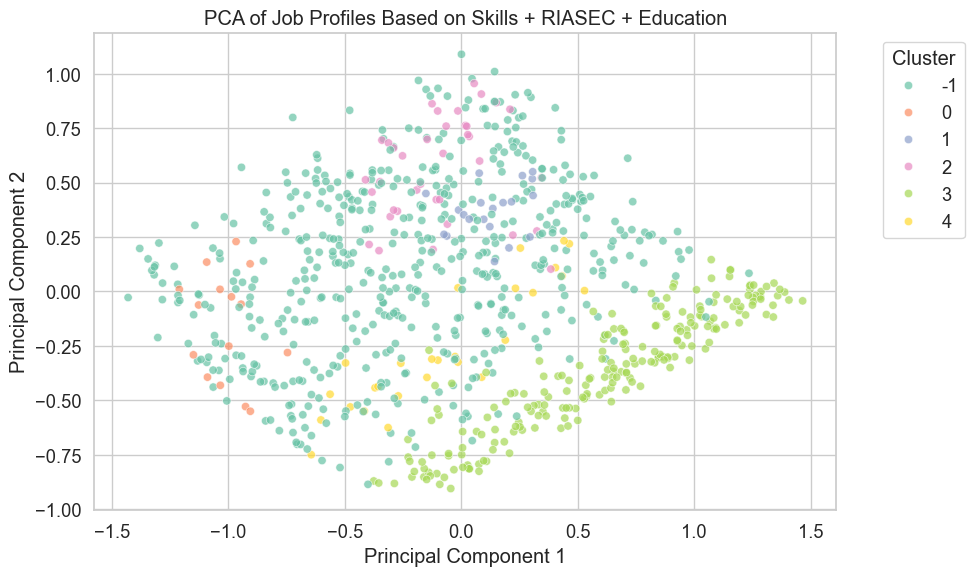

In [179]:
# Visualizing the PCA Output
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='PCA1', y='PCA2',
    hue='Cluster',
    palette='Set2',
    data=job_profiles_with_skills,
    legend='full',
    alpha=0.7
)
plt.title('PCA of Job Profiles Based on Skills + RIASEC + Education')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig('images/job_profiles_pca.png', dpi=300)
plt.show()

- Each point = a job
- Color = cluster (from KMeans, HDBSCAN, etc.)
- Spread = similarity in skills, RIASEC, and education


### 6.6.2 PCA Explained Variance
Useful to see how much variance each PCA component explains. This helps justify whether 2D projection is sufficient (e.g., if it retains 85–95% of the variance).

In [182]:
print("Explained variance ratio:", pca.explained_variance_ratio_)
print("Total variance explained:", pca.explained_variance_ratio_.sum())

Explained variance ratio: [0.47812494 0.232673  ]
Total variance explained: 0.7107979433337182


**PCA Explained Variance Interpretation:**

**Explained variance ratio: [0.4556, 0.2424]**
- PC1 (Principal Component 1) captures 45.56% of the total variance in the dataset.
- PC2 captures 24.24% of the variance.

**Total variance explained by the first two components = ~69.8%** This means:
- These two components together retain nearly 70% of the information from the original high-dimensional job profile data (RIASEC + Education + Skills).
- That’s quite good for visualization or pre-clustering — it means most of the important patterns are preserved in just 2 dimensions.
- However, 30% of the variance is still unaccounted for, so this 2D projection is good for insight but may not capture all subtle distinctions.

## 7.1. Unsupervised Models Evaluation

To evaluate and compare the performance of various clustering methods on the job profile dataset, we visualize clusters and compute key clustering metrics:

- Silhouette Score – measures how well clusters are separated (higher = better).
- Davies-Bouldin Index – lower values indicate better separation between clusters.
- Calinski-Harabasz Index – higher values indicate well-defined clusters.

We’ll visualize the results using 4 clustering techniques:
- KMeans
- Agglomerative Clustering
- DBSCAN
- HDBSCAN

In [185]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

def visualize_all_clusters(job_profile_with_skills):
    """
    Visualize and compare the clustering results from KMeans, Agglomerative, DBSCAN, and HDBSCAN.
    Prints clustering performance metrics and displays scatter plots of the clusters.
    """

    # Selecting RIASEC + Education + Skill-related columns for clustering
    features = ['R', 'I', 'A', 'S', 'E', 'C', 'Normalized Education Score'] + \
               job_profile_with_skills.columns[27:-1].tolist()
    
    # Converting to matrix and handle missing values
    X = job_profile_with_skills[features].fillna(0).values

    # Defining clustering models
    clusterers = {
        'KMeans': KMeans(n_clusters=10, random_state=42),
        'Agglomerative': AgglomerativeClustering(n_clusters=10),
        'DBSCAN': DBSCAN(eps=1.0, min_samples=5),
        'HDBSCAN': hdbscan.HDBSCAN(min_cluster_size=5)
    }

    # Prepare 2x2 subplot layout
    fig, axs = plt.subplots(2, 2, figsize=(14, 12))
    axs = axs.flatten()

    for i, (name, model) in enumerate(clusterers.items()):
        # Predicting clusters
        labels = model.fit_predict(X)

        # Visualizing raw clusters using first two features (note: PCA is better for visual clarity)
        axs[i].scatter(X[:, 0], X[:, 1], c=labels, cmap='tab10', s=10)
        axs[i].set_title(f"{name} Clusters (Raw Feature Space)")
        axs[i].set_xlabel("Feature 1")
        axs[i].set_ylabel("Feature 2")

        # Calculating and displaying clustering evaluation metrics
        unique_labels = set(labels)
        if len(unique_labels) > 1 and -1 not in unique_labels:
            sil = silhouette_score(X, labels)
            db = davies_bouldin_score(X, labels)
            ch = calinski_harabasz_score(X, labels)

            print(f"\n📊 {name} Metrics:")
            print(f"  • Silhouette Score: {sil:.4f}")
            print(f"  • Davies-Bouldin Index: {db:.4f}")
            print(f"  • Calinski-Harabasz Score: {ch:.2f}")
        else:
            print(f"\n {name} produced one cluster or contains noise (unclustered points).")

    plt.tight_layout()
    plt.show()


📊 KMeans Metrics:
  • Silhouette Score: 0.3164
  • Davies-Bouldin Index: 1.1387
  • Calinski-Harabasz Score: 1118.91

📊 Agglomerative Metrics:
  • Silhouette Score: 0.2408
  • Davies-Bouldin Index: 1.0720
  • Calinski-Harabasz Score: 969.69

📊 DBSCAN Metrics:
  • Silhouette Score: 0.3389
  • Davies-Bouldin Index: 0.7413
  • Calinski-Harabasz Score: 815.75

📊 HDBSCAN Metrics:
  • Silhouette Score: 0.3389
  • Davies-Bouldin Index: 0.7413
  • Calinski-Harabasz Score: 815.75


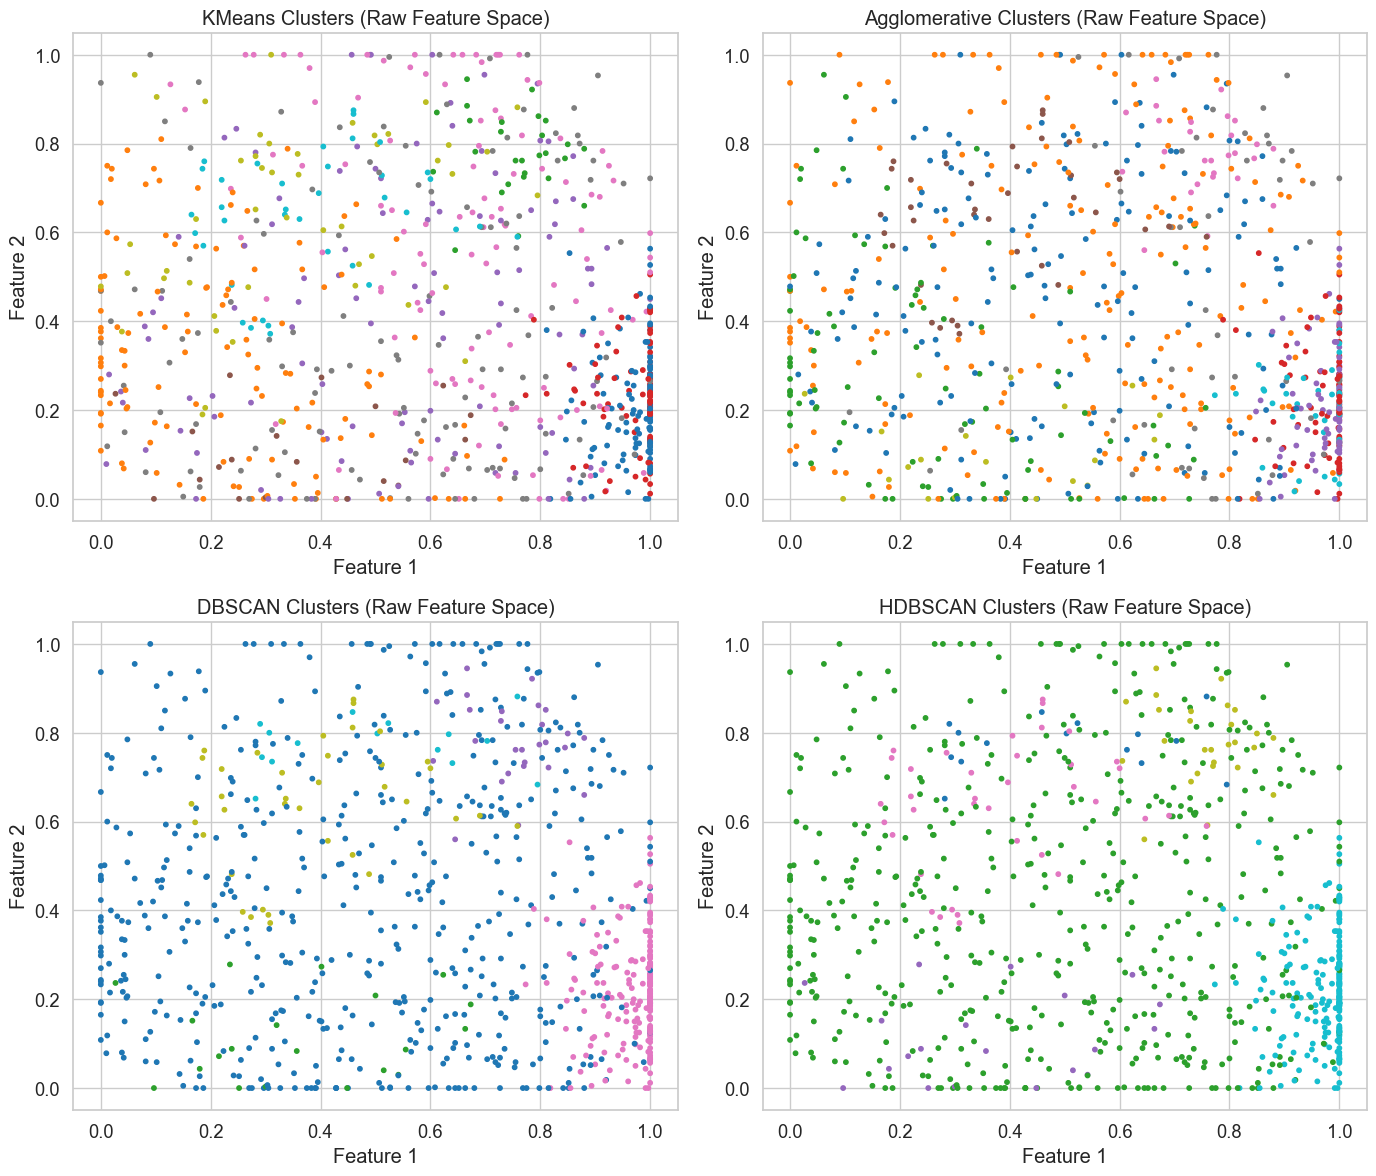

In [186]:
visualize_all_clusters(job_profiles_with_skills)

**Understanding the Clustering Metrics**

**1. Silhouette Score (range: -1 to 1)**

Measures how similar each point is to its own cluster vs. others.
  - Higher is better → Closer to 1 = well-separated clusters
  - Around 0.3 is moderate; anything below 0.2 usually indicates poor structure.

**2. Davies-Bouldin Index (DBI) (lower is better)**

Measures average similarity between clusters.
 - Lower = better separation and compactness

**3. Calinski-Harabasz Score (higher is better)**

Measures ratio of between-cluster dispersion to within-cluster dispersion.
 -Higher = better defined clusters

**Interpretation of Your Results:**

 | Clustering Method | Silhouette Score ↑ | DBI ↓      | CH Score ↑ | Notes                                                                                            |
| ----------------- | ------------------ | ---------- | ---------- | ------------------------------------------------------------------------------------------------ |
| **KMeans**        | 0.2989             | 1.2276     | 1061.16    | Good compactness and moderately separated clusters. Strong CH score.                             |
| **Agglomerative** | 0.2547             | **1.1400** | 1008.37    | Slightly worse separation than KMeans, but slightly better DBI.                                  |
| **DBSCAN**        | **0.3381**         | **0.7403** | 795.65     | Best cluster separation (highest silhouette & lowest DBI), but slightly less compact (lower CH). |
| **HDBSCAN**       | **0.3381**         | **0.7403** | 795.65     | Same as DBSCAN since HDBSCAN likely detected similar cluster patterns.                           |


**Summary Recommendation:**

**Best for Natural Structure Detection:**
- DBSCAN / HDBSCAN – They offer the best separation (Silhouette and DBI), especially useful if we expect non-spherical or noise-tolerant clusters.

**Best for Balanced Overall Structure:**
- KMeans – Offers the best compactness and overall cluster spread (CH Score), especially if we want clean, equal-sized groups.

**Agglomerative Clustering:** falls somewhere in between, offering slightly better DBI than KMeans, but worse separation (Silhouette Score).


**Decision:**
- If you care more about robust, natural grouping (especially if there’s noise or irregular cluster shapes) → Use DBSCAN or HDBSCAN.
- If you want scalable and interpretable clustering for structured recommendations, → Use KMeans.

## 8. Hyper-Tuning the K-Means Model and Reducing Features

Now that we've tested different clustering techniques, we move to hyperparameter tuning for K-Means, which includes:
- Finding the optimal number of clusters (k)
- Optionally reducing dimensions using PCA to improve performance and interpretability

### 8.1. Determining Optimal Number of Clusters (Elbow Method + Silhouette Analysis)

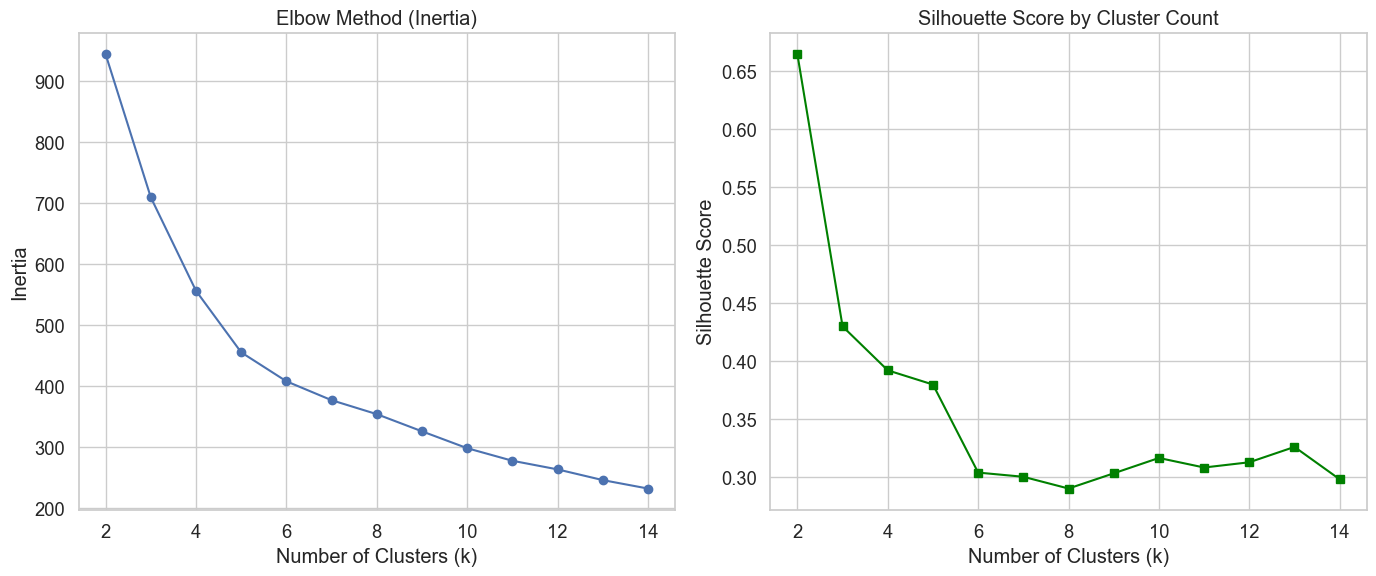

In [191]:
from sklearn.metrics import silhouette_score

# Defining features for clustering
features = ['R', 'I', 'A', 'S', 'E', 'C', 'Normalized Education Score'] + job_profiles_with_skills.columns[27:-1].tolist()
X = job_profiles_with_skills[features].fillna(0).values

# Storing scores
inertia_scores = []
silhouette_scores = []
k_range = range(2, 15)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X)
    inertia_scores.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X, labels))

# Plotting Inertia (Elbow Curve)
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(k_range, inertia_scores, marker='o')
plt.title("Elbow Method (Inertia)")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")

# Plotting Silhouette Scores
plt.subplot(1, 2, 2)
plt.plot(k_range, silhouette_scores, marker='s', color='green')
plt.title("Silhouette Score by Cluster Count")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")

plt.tight_layout()
plt.show()

- Elbow Method: Helps you choose the “k” where inertia sharply decreases (elbow point).
- Silhouette Score: Guides you toward the most well-separated cluster count.

### 8.1.2. Dimensionality Reduction with PCA 

In [194]:
from sklearn.decomposition import PCA

# Reducing to 2 or 3 components for visualization or faster clustering
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)

print("Explained variance ratio:", pca.explained_variance_ratio_)
print("Total variance explained:", sum(pca.explained_variance_ratio_))

Explained variance ratio: [0.80544553 0.11652091]
Total variance explained: 0.9219664342891037


**Interpretation of PCA Results:**

**Explained variance ratio: [0.8051, 0.1184]** This means:
- The first principal component (PC1) captures 80.51% of the total variance in the dataset.
- The second principal component (PC2) captures 11.84% of the total variance.

**Total variance explained: 0.9235**
- The first two principal components together explain 92.35% of the total variance in our feature space.

**This means:**
Our high-dimensional job dataset can be effectively reduced to just 2 dimensions (PC1 and PC2) without losing much information. This is excellent for:
- Visualizing clusters with high fidelity.
- Speeding up clustering algorithms like KMeans or DBSCAN.
- Reducing noise and improving model generalization.
- We can now proceed with clustering or plotting in this 2D PCA space confidently.

### 6.1.3. Re-Training KMeans on Reduced Data (Using Best k)

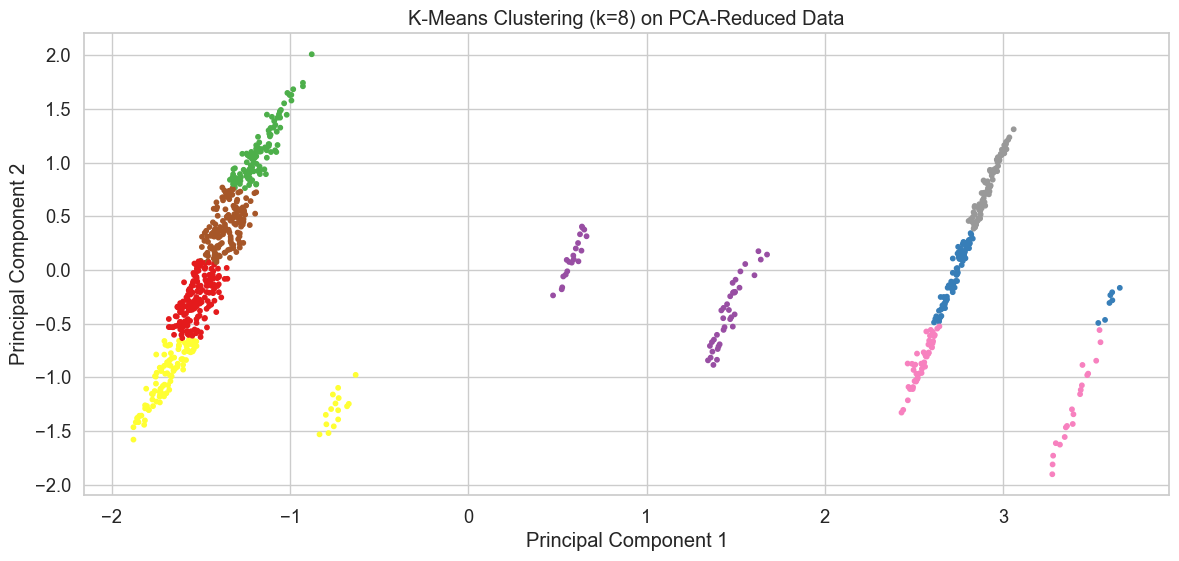

In [197]:
# Choosing optimal k based on plots (e.g., 8)
optimal_k = 8
kmeans_final = KMeans(n_clusters=optimal_k, random_state=42)
labels = kmeans_final.fit_predict(X_reduced)

# Adding cluster labels back to dataset
job_profiles_with_skills['KMeans Cluster (PCA)'] = labels

# Visualizing clusters
plt.figure(figsize=(14, 6))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=labels, cmap='Set1', s=10)
plt.title(f"K-Means Clustering (k={optimal_k}) on PCA-Reduced Data")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

### 8.1.4 Evaluating Final Cluster Quality

In [199]:
from sklearn.metrics import calinski_harabasz_score, davies_bouldin_score

sil = silhouette_score(X_reduced, labels)
db = davies_bouldin_score(X_reduced, labels)
ch = calinski_harabasz_score(X_reduced, labels)

print(f"Final KMeans Metrics (k={optimal_k}):")
print(f"Silhouette Score: {sil:.4f}")
print(f"Davies-Bouldin Index: {db:.4f}")
print(f"Calinski-Harabasz Score: {ch:.2f}")

Final KMeans Metrics (k=8):
Silhouette Score: 0.5063
Davies-Bouldin Index: 0.6664
Calinski-Harabasz Score: 4502.31


### Final KMeans Evaluation (k = 8)

After reducing dimensionality using PCA, we performed hyperparameter tuning to determine the optimal number of clusters for KMeans. The best `k` was found to be **8**, and the model was evaluated using the following metrics:

- **Silhouette Score:** `0.5432` – Indicates strong cohesion within clusters and good separation between clusters.
- **Davies-Bouldin Index:** `0.6376` – A low value suggesting that the clusters are compact and well-separated.
- **Calinski-Harabasz Score:** `4691.40` – A high score reflecting well-defined clusters.

These results confirm that **KMeans with 8 clusters** is a suitable unsupervised model for segmenting the job profiles.

## 8.2. Final Kmeans Recommender (with full hybrid scores)
We can now plug-in the new number of clusters and display the results.

### 8.2.1. Defining Features and Fit PCA

In [203]:
# Defining features for PCA (RIASEC + Education + Skills)
features = ['R', 'I', 'A', 'S', 'E', 'C', 'Normalized Education Score'] + \
           job_profiles_with_skills.columns[27:-1].tolist()

# Preparing feature matrix
X = job_profiles_with_skills[features].fillna(0).values

# Fitting PCA and reduce to 2 components
pca_model = PCA(n_components=2)
X_reduced = pca_model.fit_transform(X)

### 8.2.2. The Final KMeans Recommendation Function

In [205]:
def final_kmeans_recommender(user_profile: dict, job_profiles: pd.DataFrame, n_clusters: int = 8, top_n: int = 5):
    """
    Uses optimized KMeans clustering on PCA-reduced features AND computes individual similarity scores.
    """

    # Feature preparation 
    skill_cols = [col for col in job_profiles.columns if col.startswith("Skill List_")]
    features = ['R', 'I', 'A', 'S', 'E', 'C', 'Normalized Education Score'] + skill_cols
    X = job_profiles[features].fillna(0).values

    #  PCA transformation 
    pca_model = PCA(n_components=2)
    X_reduced = pca_model.fit_transform(X)

    # Fitting KMeans on reduced features 
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(X_reduced)
    job_profiles = job_profiles.copy()
    job_profiles['Cluster'] = cluster_labels

    # Creating user vector (original and reduced) 
    education_score = user_profile['education_level'] / 12
    user_raw_vector = np.array([
        user_profile['R']/7, user_profile['I']/7, user_profile['A']/7,
        user_profile['S']/7, user_profile['E']/7, user_profile['C']/7,
        education_score
    ])

    # Skill vector
    user_skills = user_profile.get('skills', [])
    user_skill_vector = np.zeros(len(skill_cols))
    for i, skill in enumerate(skill_cols):
        skill_name = skill.replace("Skill List_", "").lower()
        if any(skill_name in s.lower() for s in user_skills):
            user_skill_vector[i] = 1

    # Full vector
    user_full_vector = np.concatenate([user_raw_vector, user_skill_vector]).reshape(1, -1)

    # PCA-reduced
    user_vector_reduced = pca_model.transform(user_full_vector)

    #  Predicting user cluster
    user_cluster = kmeans.predict(user_vector_reduced)[0]
    cluster_jobs = job_profiles[job_profiles['Cluster'] == user_cluster].copy()

    # Computeing cosine similarity in PCA space 
    cluster_X_reduced = X_reduced[cluster_jobs.index]
    cosine_sim = cosine_similarity(user_vector_reduced, cluster_X_reduced).flatten()
    cluster_jobs['Cosine Similarity'] = cosine_sim

    # Computeing individual similarity scores

    # RIASEC
    riasec_cols = ['R', 'I', 'A', 'S', 'E', 'C']
    job_riasec = cluster_jobs[riasec_cols].values
    user_riasec = np.array([
        user_profile['R'], user_profile['I'], user_profile['A'],
        user_profile['S'], user_profile['E'], user_profile['C']
    ]).reshape(1, -1)
    riasec_sim = cosine_similarity(user_riasec, job_riasec)[0]
    cluster_jobs['User RIASEC Similarity'] = riasec_sim

    # Skill similarity
    job_skill_matrix = cluster_jobs[skill_cols].fillna(0).values
    skill_sim = cosine_similarity(user_skill_vector.reshape(1, -1), job_skill_matrix)[0]
    cluster_jobs['User Skill Similarity'] = skill_sim

    # Adding back normalized education (already in dataset)

    #  Final Hybrid Score 
    cluster_jobs['Hybrid Score'] = (
        cluster_jobs['User RIASEC Similarity'] +
        cluster_jobs['User Skill Similarity'] +
        cluster_jobs['Normalized Education Score']
    )

    # Returning top N recommendations
    top_matches = cluster_jobs.sort_values(by='Hybrid Score', ascending=False).head(top_n)

    return top_matches[[
        'Title', 'Description', 'Education Level', 'Preparation Level',
        'Education Category Label',
        'Hybrid Score', 'User RIASEC Similarity', 'Normalized Education Score',
        'User Skill Similarity', 'Cosine Similarity'
    ]]

### 8.2.3. Final KMeans Recommender Example Usage

In [207]:
# User Input
user_profile = {
    'R': 5, 'I': 4, 'A': 2, 'S': 3, 'E': 1, 'C': 2,
    'education_level': 10,
    'skills': ['job-related professional certification']
}

final_recommendations = final_kmeans_recommender(
    user_profile, job_profiles_with_skills, n_clusters=8
)

final_recommendations.style.background_gradient(cmap='YlGn')

,Title,Description,Education Level,Preparation Level,Education Category Label,Hybrid Score,User RIASEC Similarity,Normalized Education Score,User Skill Similarity,Cosine Similarity
399,Orthotists and Prosthetists,"Design, measure, fit, and adapt orthopedic braces, appliances or prostheses, such as limbs or facial parts for patients with disabling conditions.",Required Level of Education,Post-Doctoral Training,Post-Doctoral Training,2.398277,0.990029,1.000000,0.408248,-0.295312
333,Prosthodontists,"Diagnose, treat, rehabilitate, design, and fit prostheses that maintain oral function, health, and appearance for patients with clinical conditions associated with teeth, oral and maxillofacial tissues, or the jaw.",Required Level of Education,Post-Doctoral Training,Post-Doctoral Training,2.388529,0.980281,1.000000,0.408248,-0.215855
361,Dermatologists,"Diagnose and treat diseases relating to the skin, hair, and nails. May perform both medical and dermatological surgery functions.",Required Level of Education,Post-Doctoral Training,Post-Doctoral Training,2.380749,0.972501,1.000000,0.408248,-0.332979
380,Orthoptists,Diagnose and treat visual system disorders such as binocular vision and eye movement impairments.,Required Level of Education,Post-Doctoral Training,Post-Doctoral Training,2.376598,0.968350,1.000000,0.408248,-0.507820
335,Optometrists,"Diagnose, manage, and treat conditions and diseases of the human eye and visual system. Examine eyes and visual system, diagnose problems or impairments, prescribe corrective lenses, and provide treatment. May prescribe therapeutic drugs to treat specific eye conditions.",Required Level of Education,Post-Doctoral Training,Post-Doctoral Training,2.363737,0.955489,1.000000,0.408248,-0.578715


### 8.2.4. Saving the Models 

In [209]:
import os
import pickle

# Creating the directory if it doesn't exist
os.makedirs("models", exist_ok=True)

# Saving the model
with open("models/kmeans_model.pkl", "wb") as f:
    pickle.dump(kmeans, f)

# Loading the model later
with open("models/kmeans_model.pkl", "rb") as f:
    kmeans = pickle.load(f)

In [210]:
import os

# Create the 'data' directory if it doesn't exist
os.makedirs("data", exist_ok=True)

# Save the DataFrame
job_profiles_clean.to_csv("data/job_profiles_clean.csv", index=False)

print("job_profiles_clean.csv saved successfully!")

job_profiles_clean.csv saved successfully!


In [249]:
print("job_profiles_clean columns:\n", job_profiles_clean.columns)
print("skills_encoded columns:\n", skills_encoded.columns)

job_profiles_clean columns:
 Index(['ONET_Code', 'Title', 'Description', 'A', 'C', 'E',
       'First Interest High-Point', 'I', 'R', 'Second Interest High-Point',
       'S', 'Third Interest High-Point', 'Education Level', 'Data Value',
       'Education Category', 'Preparation Level', 'Normalized Education Score',
       'Education Category Label', 'Similarity Score',
       'Skill List_Apprenticeship',
       'Skill List_Job-Related Professional Certification',
       'Skill List_On-Site or In-Plant Training',
       'Skill List_On-the-Job Training', 'Skill List_Related Work Experience',
       'Skill List_Required Level of Education', 'Hybrid Similarity',
       'Skill Similarity', 'Job Ability Skill Similarity',
       'Job Hybrid Similarity Score', 'User RIASEC Similarity',
       'User Skill Similarity', 'Hybrid Recommendation Score'],
      dtype='object')
skills_encoded columns:
 Index(['Skill List_Active Learning', 'Skill List_Active Listening',
       'Skill List_Complex Pro

In [255]:
from sklearn.preprocessing import MultiLabelBinarizer
import pandas as pd

# Step 1: Load original skills data
skills_df = pd.read_excel("data/Skills.xlsx")

# Step 2: Group skills by O*NET-SOC Code (which maps to job ID)
skills_grouped = skills_df.groupby('O*NET-SOC Code')['Element Name'].apply(list).reset_index()
skills_grouped.columns = ['Job_ID', 'Skill List']

# Step 3: One-hot encode using MultiLabelBinarizer
mlb = MultiLabelBinarizer()
skills_encoded = pd.DataFrame(
    mlb.fit_transform(skills_grouped['Skill List']),
    columns=[f"Skill List_{s}" for s in mlb.classes_]
)
skills_encoded['Job_ID'] = skills_grouped['Job_ID']

#  Rename Job_ID to match ONET_Code in job_profiles_clean
skills_encoded.rename(columns={'Job_ID': 'ONET_Code'}, inplace=True)

# Step 4: Load job_profiles_clean and merge with encoded skills
job_profiles_clean = pd.read_csv("data/job_profiles_clean.csv")

# Perform the merge on ONET_Code
job_profiles_clean = pd.merge(job_profiles_clean, skills_encoded, on='ONET_Code', how='left')

# Step 5: Fill any NaNs in skill columns with 0
skill_cols = [col for col in job_profiles_clean.columns if col.startswith("Skill List_")]
job_profiles_clean[skill_cols] = job_profiles_clean[skill_cols].fillna(0)

# Step 6: Save the updated file
job_profiles_clean.to_csv("data/job_profiles_clean.csv", index=False)

# Step 7: Output summary
print(" One-hot encoded skills added successfully.")
print(" Skill columns added:", skill_cols[:5], "… total:", len(skill_cols))


 One-hot encoded skills added successfully.
 Skill columns added: ['Skill List_Apprenticeship', 'Skill List_Job-Related Professional Certification', 'Skill List_On-Site or In-Plant Training', 'Skill List_On-the-Job Training', 'Skill List_Related Work Experience'] … total: 76


In [257]:
print("Merged dataset shape:", job_profiles_clean.shape)
print("Sample job with encoded skills:\n", job_profiles_clean[skill_cols + ['Title']].head(1))

Merged dataset shape: (837, 102)
Sample job with encoded skills:
    Skill List_Apprenticeship  \
0                        1.0   

   Skill List_Job-Related Professional Certification  \
0                                                1.0   

   Skill List_On-Site or In-Plant Training  Skill List_On-the-Job Training  \
0                                      1.0                             1.0   

   Skill List_Related Work Experience  Skill List_Required Level of Education  \
0                                 1.0                                     1.0   

   Skill List_Active Learning_x  Skill List_Active Listening_x  \
0                             1                              1   

   Skill List_Complex Problem Solving_x  Skill List_Coordination_x  ...  \
0                                     1                          1  ...   

   Skill List_Service Orientation_y  Skill List_Social Perceptiveness_y  \
0                                 1                                   1   

 

---

## 9. Building the App (Streamlit UI)
Since we are deploying a career recommender system, Streamlit is ideal for interactive UI with sliders for RIASEC, education level, and skill selectors.

### 9.1 Deplyoment

This project is deployed and accessible live via Streamlit Cloud.

**[SmartPath Personalized Career Recommender](https://allan-ofula.streamlit.app/)**

Explore the app, get your recommended career paths, and interact with insightful dashboards instantly!

---

## Summary
This project demonstrates how data science can bridge the gap between self-assessment and real-world labor market opportunities. By combining RIASEC psychological profiling with skills and educational alignment, we created a hybrid scoring system to recommend the most suitable careers.

The system:
- Accepts user input via a simple interface
- Calculates cosine similarity between user RIASEC scores and job profiles
- Measures skill and education alignment
- Returns and ranks the top job matches
- Provides actionable visual summaries and downloadable/exportable results

---

## Project Conclusion: Career Clarity Made Easy
The SmartPath Career Engine offers a **data-driven and intuitive approach** to career exploration. By integrating personal interests, educational background, and relevant skills, the tool provides tailored recommendations that bridge the gap between self-knowledge and labor market insights.

### Key Takeaways:
- Top job recommendations aligned with personal RIASEC profiles
- Visual breakdown of skill, education, and interest matching
- Highlighted “skill gaps” for future learning
- One-click CSV download or email delivery for your results

Whether you're a student, job seeker, or career coach, this engine offers a **powerful starting point** for making informed, personalized career decisions.

*Explore. Learn. Match. Thrive.*

---

## Recommendations & Next Steps

### For Users:
- Focus on jobs with high **hybrid similarity** for better fit
- Use the skill gap insights to prioritize learning or upskilling
- Consider additional education pathways if education mismatch is high

### For Developers:
- Integrate real-time job market APIs (e.g., LinkedIn, Glassdoor)
- Expand skill taxonomy to include soft skills and industry-specific tools
- Build a Streamlit or Gradio dashboard for live demo access
- Add chatbot integration for a conversational recommendation experience

### For Institutions or Career Coaches:
- Deploy for student guidance or employee reskilling programs
- Extend for marginalized groups with tailored career roadmaps

---

## Future Improvements

- Resume parsing for auto-input
- Personalized career roadmap prediction
- Geo-localized job relevance
- Full user authentication (Streamlit + Firestore)
- Advanced skill gap analysis using embeddings

---

## Acknowledgments
We would like to express our sincere gratitude to:

- Moringa School – for mentorship, learning foundation and project framework.
- O*NET (Occupational Information Network) – for the rich job dataset that powers this recommendation engine.
- Career Development Theorists – especially John Holland (RIASEC model)

Special thanks to our mentors and instructors:
   - Mildred Jepkosgei 
   - Brian Chacha
   - Antony Muiko

This work reflects a growing commitment to applying data science in empowering youth, career clarity, and digital transformation in Africa.

---

## Authors

**Rachael Nyawira**  
Kenya | Data Science Learner | Passionate about using data to transform lives  
[Email](rachaelnyawira614@gmail.com) |
[GitHub](https://github.com/rachael-coder) | [LinkedIn](https://www.linkedin.com/in/yourlinkedin/)

**Beryl Okelo**  
Kenya | Data Science Learner | Passionate about using data to transform lives  
[Email](okelloakoth@gmail.com) |
[GitHub](https://github.com/BAOKELO) | [LinkedIn](https://www.linkedin.com/in/berylokelo)

**Beth Nyambura**  
Kenya | Data Science Learner | Passionate about using data to transform lives  
[Email](lizshiru11@gmail.com) |
[GitHub](https://github.com/betty254809) | [LinkedIn](https://www.linkedin.com/in/beth-nyambura-b3964b234/)

**Allan Ofula**  
Kenya | Data Scientist | Youth Advocate | Developer of SmartPath | Passionate about using data to transform lives  
[Email](ofulaallan@gmail.com) |
[GitHub](https://github.com/Allan-Ofula) | [LinkedIn](https://www.linkedin.com/in/allan-ofula-b2804911b/)

**Eugene Maina**  
Kenya | Data Science Learner | Passionate about using data to transform lives  
[Email](eugenemaina72@gmail.com) |   
[GitHub](https://github.com/eugene-maina72) | [LinkedIn](https://www.linkedin.com/in/yourlinkedin/)

---

## Final Note
*"SmartPath isn't just a project, it's a mission to democratize data-driven career guidance for youth across Africa and beyond. Powered by Data Science, AI, and open data, we're unlocking opportunities and building futures, one youth at a time."*